In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42

In [2]:
orthogroups = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Finalized_Orthology_Nov_15/Reformatted_orthogroup_table.csv"
)

In [3]:
tissue_directory = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Final_species_RNA_data/sample_to_tissue.csv",
    sep="\t",
)
tissue_directory = tissue_directory.replace(
    {
        "apices": "Apex",
        "coty": "Cotyledon",
        "In": "Inflorescence",
        "leaves": "Leaf",
        "hypo": "Hypocotyl",
        "pric": "Prickle",
        "fruit": "Fruit",
        "flower": "Flower",
        "meristem": "Meristem",
    }
)
tissue_directory

,Species,Sample,Tissue,Sample Name,Total Reads,% Uniquely mapped,% multimapped,% unmapped,Fastq Path Paried Read1,Fastq Path Paired Read 2
0,abutiloides,Sabu2,Apex,Sabu2_apices_2_S11,46869976.0,88.2758,3.39319,8.33102,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
1,abutiloides,Sabu2,Apex,Sabu2_apices_3_S17,42814613.0,86.7834,3.17339,10.04320,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
2,aethiopicum,Saet3,Apex,Saet3_apices_1_S1,31885899.0,88.5922,4.63972,6.76812,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
3,aethiopicum,Saet3,Apex,Saet3_apices_2_S2,31235923.0,88.5767,4.57639,6.84692,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
4,aethiopicum,Saet3,Apex,Saet3_apices_3_S3,31476966.0,88.9584,4.59573,6.44585,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
...,...,...,...,...,...,...,...,...,...,...
258,lycopercicum,M82,Meristem,M82_SIM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
259,lycopercicum,M82,Meristem,M82_SYM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
260,lycopercicum,M82,Meristem,M82_SYM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
261,lycopercicum,M82,Meristem,M82_TM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...


In [4]:
same_counts = pd.read_csv("/data/suresh/pansol/counts/Same3_TPM_counts.csv")
same_counts

,AvrRps4_S196_L003,EV_S195_L003,MgCl2_S194_L003,Same-1_S57,Same-1_S5,Same-2_S58,Same-2_S6,Same-3_S59,Same-3_S7,Same-4_S60,Same-4_S8,Same3-1_S13,Same3-2_S14,Same3-3_S18,SP2273_RNA_pool
gene:Solame3_01g000010,0.000000,0.037703,0.000000,11.301020,0.071679,18.251670,0.309366,13.032989,0.000000,16.603793,0.665609,0.000000,0.083818,0.000000,0.012414
gene:Solame3_01g000030,1.114272,5.627271,8.092275,29.723476,11.356533,23.004364,5.860447,25.686450,6.076420,21.511947,4.585052,73.498390,94.305184,125.029631,4.959969
gene:Solame3_01g000040,0.227789,0.536841,0.612317,1.797177,0.349922,1.210608,0.503420,1.325505,0.740140,1.509426,0.481386,1.339386,1.409397,1.388423,0.459584
gene:Solame3_01g000050,42.768931,79.475897,69.592834,76.238272,40.188987,136.977358,50.738958,141.022677,49.746602,146.712631,50.268107,107.864698,113.480645,138.366151,63.926180
gene:Solame3_01g000060,2.145353,3.723206,5.257124,3.033781,2.253223,4.126030,2.627682,3.069228,2.809660,3.446009,1.902120,3.784753,3.974372,4.691839,3.717180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gene:Solame3_ctg00001741g000070,1.171082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.292171,0.000000,0.389466
gene:Solame3_ctg00001741g000080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gene:Solame3_ctg00001743g000010,0.000000,0.000000,0.000000,0.881813,0.615239,1.419009,0.221280,0.000000,0.000000,0.000000,0.211596,0.087220,0.319745,0.443846,0.000000
gene:Solame3_ctg00001744g000010,0.260915,0.131767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130158


In [5]:
same_tissue = tissue_directory.loc[tissue_directory["Species"] == "americanum"]
same_tissue

,Species,Sample,Tissue,Sample Name,Total Reads,% Uniquely mapped,% multimapped,% unmapped,Fastq Path Paried Read1,Fastq Path Paired Read 2
23,americanum,Same3,RNA,SP2273_RNA_pool_apices_,100757079.0,86.8237,8.48070,4.69562,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
24,americanum,Same3,S194,MgCl2_S194_L003_apices_,32335920.0,86.0741,9.33202,4.59387,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
25,americanum,Same3,S195,EV_S195_L003_apices_,34809470.0,86.8601,8.31747,4.82243,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
26,americanum,Same3,S196,AvrRps4_S196_L003_apices_,33611689.0,87.5071,7.83074,4.66218,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
27,americanum,Same3,Apex,Same3_apices_1_S13,42448269.0,74.2246,9.09018,16.68520,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
28,americanum,Same3,Apex,Same3_apices_2_S14,46517279.0,77.6201,8.75325,13.62660,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
29,americanum,Same3,Apex,Same3_apices_3_S18,35637821.0,78.5101,8.69692,12.79290,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
30,americanum,Same3,Cotyledon,Same_coty_1_S5,14747245.0,82.1462,11.45010,6.40366,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
31,americanum,Same3,Cotyledon,Same_coty_2_S6,14621575.0,81.4765,11.03310,7.49036,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...
32,americanum,Same3,Cotyledon,Same_coty_3_S7,13573865.0,81.6443,11.27480,7.08093,/grid/lippman/data/pansol/americanum/Same3/dat...,/grid/lippman/data/pansol/americanum/Same3/dat...


In [6]:
same_tissue_dict = {}
for sample in same_counts.columns:
    split_sample = sample.split("_")[-1] + "$"
    tissue_type = same_tissue["Tissue"].loc[
        same_tissue["Sample Name"].str.contains(split_sample, regex=True)
    ]
    if len(tissue_type) != 1:
        split_sample_start = sample.split("_")[1]
        tissue_type = same_tissue["Tissue"].loc[
            same_tissue["Sample Name"].str.contains(split_sample_start)
        ]
        if len(tissue_type) != 1:
            raise Exception("No single match")
    same_tissue_dict[sample] = tissue_type.item()

In [7]:
species_list = tissue_directory["Species"].unique().tolist()
species_list.remove("aethiopicum")
species_list.remove("lycopercicum")
species_list

['abutiloides',
 'americanum',
 'anguivi',
 'candidum',
 'citrullifolium',
 'cleistogamum',
 'etuberosum',
 'giganteum',
 'havanense',
 'insanum',
 'linearifolium',
 'macrocarpon',
 'mammosum',
 'muricatum1',
 'muricatum2',
 'prinophyllum',
 'pseudolulo',
 'quitoense',
 'robustum',
 'stramoniifolium',
 'torvum',
 'violaceum']

In [8]:
all_species_dict = {}
for species in species_list:
    current_tissue = tissue_directory.loc[tissue_directory["Species"] == species]
    current_species = current_tissue["Sample"].iloc[0]
    current_rna = "/data/suresh/pansol/counts/" + current_species + "_TPM_counts.csv"
    rna_counts = pd.read_csv(current_rna)
    for sample in rna_counts.columns:
        split_sample = sample.split("_")[-1] + "$"
        tissue_type = current_tissue["Tissue"].loc[
            current_tissue["Sample Name"].str.contains(split_sample, regex=True)
        ]
        if len(tissue_type) != 1:
            split_sample_start = sample.split("_")[1]
            tissue_type = current_tissue["Tissue"].loc[
                current_tissue["Sample Name"].str.contains(split_sample_start)
            ]
            if len(tissue_type) != 1:
                tissue_type = current_tissue["Tissue"].loc[
                    current_tissue["Fastq Path Paried Read1"].str.contains(sample)
                ]
                if len(tissue_type) != 1:
                    raise Exception("No single match")
        all_species_dict[sample] = tissue_type.item()

In [9]:
sabu_dict_of_tissues = {"Sabu2-2_S11": "Apex", "Sabu2-3_S17": "Apex"}

In [10]:
saet_list_of_sample_tissue = {
    "Saet-1_S1": "Cotyledon",
    "Saet-1_S3": "Inflorescence",
    "Saet-1_S53": "Hypocotyl",
    "Saet-1_S56": "Leaf",
    "Saet-2_S2": "Cotyledon",
    "Saet-2_S4": "Inflorescence",
    "Saet-2_S54": "Hypocotyl",
    "Saet-2_S57": "Leaf",
    "Saet-3_S3": "Cotyledon",
    "Saet-3_S55": "Hypocotyl",
    "Saet-3_S58": "Leaf",
    "Saet-3_S5": "Inflorescence",
    "Saet-4_S4": "Cotyledon",
    "Saet-4_S56": "Hypocotyl",
    "Saet-4_S6": "Inflorescence",
    "Saet3-1_S1": "Apex",
    "Saet3-2_S2": "Apex",
    "Saet3-3_S3": "Apex",
    "Saet3-4_S4": "Apex",
    "Saet3-5_S5": "Apex",
    "Saet3-6_S6": "Apex",
}

In [11]:
full_column_to_tissue_dict = {
    **saet_list_of_sample_tissue,
    **sabu_dict_of_tissues,
    **all_species_dict,
}
full_column_to_tissue_dict

{'Saet-1_S1': 'Cotyledon',
 'Saet-1_S3': 'Inflorescence',
 'Saet-1_S53': 'Hypocotyl',
 'Saet-1_S56': 'Leaf',
 'Saet-2_S2': 'Cotyledon',
 'Saet-2_S4': 'Inflorescence',
 'Saet-2_S54': 'Hypocotyl',
 'Saet-2_S57': 'Leaf',
 'Saet-3_S3': 'Cotyledon',
 'Saet-3_S55': 'Hypocotyl',
 'Saet-3_S58': 'Leaf',
 'Saet-3_S5': 'Inflorescence',
 'Saet-4_S4': 'Cotyledon',
 'Saet-4_S56': 'Hypocotyl',
 'Saet-4_S6': 'Inflorescence',
 'Saet3-1_S1': 'Apex',
 'Saet3-2_S2': 'Apex',
 'Saet3-3_S3': 'Apex',
 'Saet3-4_S4': 'Apex',
 'Saet3-5_S5': 'Apex',
 'Saet3-6_S6': 'Apex',
 'Sabu2-2_S11': 'Apex',
 'Sabu2-3_S17': 'Apex',
 'AvrRps4_S196_L003': 'S196',
 'EV_S195_L003': 'S195',
 'MgCl2_S194_L003': 'S194',
 'Same-1_S57': 'Hypocotyl',
 'Same-1_S5': 'Cotyledon',
 'Same-2_S58': 'Hypocotyl',
 'Same-2_S6': 'Cotyledon',
 'Same-3_S59': 'Hypocotyl',
 'Same-3_S7': 'Cotyledon',
 'Same-4_S60': 'Hypocotyl',
 'Same-4_S8': 'Cotyledon',
 'Same3-1_S13': 'Apex',
 'Same3-2_S14': 'Apex',
 'Same3-3_S18': 'Apex',
 'SP2273_RNA_pool': 'RNA',

In [12]:
orthogroups.value_counts(subset="Species")

Species
Solang8_1.1.2        37659
Soltor1_1.1.2        36687
Solaet3_1.5.2        36599
Solins1_1.1.2        36481
Solpri1_1.3.2        35817
Solvio1_1.1.2        35489
Solmam1_1.1.2        35360
Solmac3_1.5.2        35169
Sollin1_1.2.2        34898
Solstr1_1.1.2        34544
Smel4.1              34433
Solcan1_1.1.2        34184
SollycM82_1.0.2      34165
Solqui2_1.3.2        33687
Solgig1_1.2.2        33400
SlycHeinz4.0         33364
Solame3_1.1.2        33151
Solrob1_1.2.2        32848
Solmur2hap2_1.3.2    32251
Solpse1_1.1.2        32243
Solmur2hap1_1.3.2    32066
Solcit1_1.1.2        31626
Solcle2_1.2.2        31573
Solabu2_1.1.2        31181
Soletu1_1.2.2        30970
Solhav1_1.2.2        27425
dtype: int64

In [13]:
species_list_for_unique_pairs = tissue_directory["Species"].unique().tolist()
species_list_for_unique_pairs.remove("lycopercicum")

In [14]:
tissue_directory

,Species,Sample,Tissue,Sample Name,Total Reads,% Uniquely mapped,% multimapped,% unmapped,Fastq Path Paried Read1,Fastq Path Paired Read 2
0,abutiloides,Sabu2,Apex,Sabu2_apices_2_S11,46869976.0,88.2758,3.39319,8.33102,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
1,abutiloides,Sabu2,Apex,Sabu2_apices_3_S17,42814613.0,86.7834,3.17339,10.04320,/grid/lippman/data/pansol/abutiloides/Sabu2/da...,/grid/lippman/data/pansol/abutiloides/Sabu2/da...
2,aethiopicum,Saet3,Apex,Saet3_apices_1_S1,31885899.0,88.5922,4.63972,6.76812,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
3,aethiopicum,Saet3,Apex,Saet3_apices_2_S2,31235923.0,88.5767,4.57639,6.84692,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
4,aethiopicum,Saet3,Apex,Saet3_apices_3_S3,31476966.0,88.9584,4.59573,6.44585,/grid/lippman/data/pansol/aethiopicum/Saet3/da...,/grid/lippman/data/pansol/aethiopicum/Saet3/da...
...,...,...,...,...,...,...,...,...,...,...
258,lycopercicum,M82,Meristem,M82_SIM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
259,lycopercicum,M82,Meristem,M82_SYM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
260,lycopercicum,M82,Meristem,M82_SYM2,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...
261,lycopercicum,M82,Meristem,M82_TM1,NaN,NaN,NaN,NaN,/grid/lippman/data/pansol/lycopersicum/M82/dat...,/grid/lippman/data/pansol/lycopersicum/M82/dat...


In [15]:
list_of_combos = tissue_directory[["Species", "Sample", "Tissue"]].drop_duplicates()

In [16]:
list_of_combos

,Species,Sample,Tissue
0,abutiloides,Sabu2,Apex
2,aethiopicum,Saet3,Apex
8,aethiopicum,Saet3,Cotyledon
12,aethiopicum,Saet3,Inflorescence
16,aethiopicum,Saet3,Hypocotyl
...,...,...,...
236,torvum,Stor1,Hypocotyl
240,violaceum,Svio1,Apex
243,violaceum,Svio1,Cotyledon
247,violaceum,Svio1,Hypocotyl


In [18]:
sensible_species_names = {
    "Solabu2_1.1.2": "abutiloides",
    "Solaet3_1.5.2": "aethiopicum",
    "Solame3_1.1.2": "americanum",
    "Solang8_1.1.2": "anguivi",
    "Solcan1_1.1.2": "candidum",
    "Solcit1_1.1.2": "citrullifolium",
    "Solcle2_1.2.2": "cleistogamum",
    "Soletu1_1.2.2": "etuberosum",
    "Solgig1_1.2.2": "giganteum",
    "Solhav1_1.2.2": "havanense",
    "Solins1_1.1.2": "insanum",
    "Sollin1_1.2.2": "linearifolium",
    "Solmac3_1.5.2": "macrocarpon",
    "Solmam1_1.1.2": "mammosum",
    "Solmur2hap1_1.3.2" : "muricatum1",
    "Solmur2hap2_1.3.2": "muricatum2",
    "Solpri1_1.3.2": "prinophyllum",
    "Solpse1_1.1.2.3.2": "pseudolulo",
    "Solqui2_1.3.2": "quitoense",
    "Solrob1_1.2.2": "robustum",
    "Solstr1_1.1.2": "stramoniifolium",
    "Soltor1_1.1.2": "torvum",
    "Solvio1_1.1.2": "violaceum",
}

In [19]:
orthogroups = orthogroups.replace(sensible_species_names)
orthogroups

,Gene Name,Orthogroup,Species
0,Solyc04g018150,OG0000003,SlycHeinz4.0
1,Solyc02g030550,OG0000004,SlycHeinz4.0
2,Solyc01g066020,OG0000005,SlycHeinz4.0
3,Solyc05g024370,OG0000005,SlycHeinz4.0
4,Solyc11g011080,OG0000005,SlycHeinz4.0
...,...,...,...
877265,Solvio1_09g012150,OG0044291,violaceum
877266,Solvio1_11g011120,OG0044292,violaceum
877267,Solvio1_11g018310,OG0044292,violaceum
877268,Solvio1_11g011570,OG0044293,violaceum


In [20]:
unique_orthogroups = orthogroups['Orthogroup'].unique()

In [28]:
divergent_orthogroup_tissue_wise_all_species = {}
for species in species_list_for_unique_pairs:
    print(species)
    current_combos = list_of_combos.loc[list_of_combos["Species"] == species]
    if len(current_combos) <= 1:
        continue
    species_ortho_dataframe = pd.DataFrame(index= unique_orthogroups, columns=current_combos['Tissue'].to_list(), data = 0) 
    species_orthogroups = orthogroups.loc[orthogroups['Species'] == species]
    truth_frame = pd.DataFrame(species_orthogroups['Orthogroup'].value_counts() == 2)
    species_paralogs = truth_frame.loc[truth_frame['Orthogroup'] == True].index.to_list()
    orthogroups_paralogs = species_orthogroups.loc[species_orthogroups['Orthogroup'].isin(species_paralogs)]
    file_name = (
        "/data/suresh/pansol/counts/"
        + current_combos["Sample"].iloc[0]
        + "_TPM_counts.csv"
    )
    current_rna_file = pd.read_csv(file_name)
    current_rna_file.index = current_rna_file.index.str.split(":").str[1]
    for tissue in current_combos["Tissue"].unique().tolist():
        list_of_column_to_use = []
        for column in current_rna_file.columns:
            if full_column_to_tissue_dict[column] == tissue:
                list_of_column_to_use.append(column)
        subset_rna_file_to_one_tissue = current_rna_file[list_of_column_to_use]
        identification_of_threshold_df = subset_rna_file_to_one_tissue.copy()
        subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
        if len(list_of_column_to_use) < 2:
            continue
        identification_of_threshold_df["Fold Change"] = abs(
            np.log2((identification_of_threshold_df.iloc[:, 0] + 0.000001))
            - np.log2((identification_of_threshold_df.iloc[:, 1] + 0.000001))
        )
        tissue_threshold = identification_of_threshold_df["Fold Change"].quantile(0.85)
        for orthogroup in orthogroups_paralogs['Orthogroup'].unique():
            genes = orthogroups_paralogs.loc[orthogroups_paralogs['Orthogroup'] == orthogroup]['Gene Name'].to_list()
            gene_pair = subset_rna_file_to_one_tissue.loc[subset_rna_file_to_one_tissue.index.isin(genes)]
            if len(gene_pair) <2:
                continue
            difference_between_pair = abs(np.log2((gene_pair['Mean'].iloc[0] + 0.000001))- np.log2((gene_pair['Mean'].iloc[1] + 0.000001)))
            if difference_between_pair > tissue_threshold:
                species_ortho_dataframe.loc[orthogroup,tissue] = 1
    divergent_orthogroup_tissue_wise_all_species[species] = species_ortho_dataframe
                

            


abutiloides
aethiopicum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

americanum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

anguivi


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

candidum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

citrullifolium


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

cleistogamum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

etuberosum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)


giganteum
havanense
insanum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

linearifolium
macrocarpon


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

mammosum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

muricatum1
muricatum2
prinophyllum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

pseudolulo
quitoense


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

robustum
stramoniifolium


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

torvum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

violaceum


/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)
/tmp/ipykernel_197220/568101544.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_rna_file_to_one_tissue['Mean'] = subset_rna_file_to_one_tissue.mean(axis = 1)


In [29]:
summary_df = pd.DataFrame(columns = ['Tissue','Number of Tissue Specific Divergent Paralogs','Species'])
for species in divergent_orthogroup_tissue_wise_all_species.keys():
    current_set = divergent_orthogroup_tissue_wise_all_species[species]
    current_df = pd.DataFrame(data = current_set.loc[current_set.sum(axis = 1) == 1].sum(), columns = ['Number of Tissue Specific Divergent Paralogs']).reset_index().rename(columns = {'index':'Tissue'})
    current_df['Species'] = species 
    summary_df = pd.concat([summary_df,current_df])

In [30]:
summary_df['Number of Tissue Specific Divergent Paralogs'] = summary_df['Number of Tissue Specific Divergent Paralogs'].astype(int)

In [31]:
summary_df['Tissue'].value_counts()

Apex             15
Cotyledon        14
Inflorescence    13
Hypocotyl        13
Leaf              7
RNA               1
S194              1
S195              1
S196              1
Flower            1
Fruit             1
Prickle           1
root              1
Name: Tissue, dtype: int64

In [32]:
summary_df = summary_df.loc[summary_df['Tissue'].isin(['Apex','Cotyledon','Inflorescence','Hypocotyl','Leaf'])]
summary_df = summary_df.loc[~(summary_df['Species'] == 'violaceum')]
summary_df

,Tissue,Number of Tissue Specific Divergent Paralogs,Species
0,Apex,105,aethiopicum
1,Cotyledon,29,aethiopicum
2,Inflorescence,82,aethiopicum
3,Hypocotyl,33,aethiopicum
4,Leaf,13,aethiopicum
4,Apex,261,americanum
5,Cotyledon,190,americanum
6,Hypocotyl,119,americanum
0,Apex,0,anguivi
1,Cotyledon,69,anguivi


<AxesSubplot:xlabel='Tissue', ylabel='Number of Tissue Specific Divergent Paralogs'>

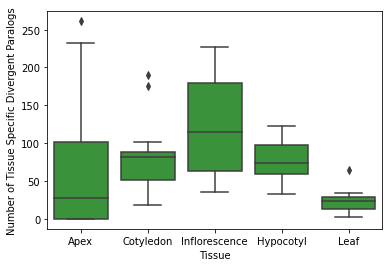

In [33]:
sns.boxplot(data = summary_df, x = 'Tissue',y ="Number of Tissue Specific Divergent Paralogs" , color= 'tab:green')

<AxesSubplot:xlabel='Tissue', ylabel='Number of Tissue Specific Divergent Paralogs'>

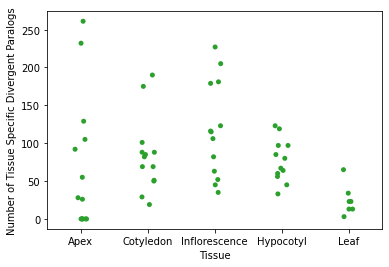

In [34]:
sns.stripplot(data = summary_df, x = 'Tissue',y ="Number of Tissue Specific Divergent Paralogs" , color= 'tab:green')

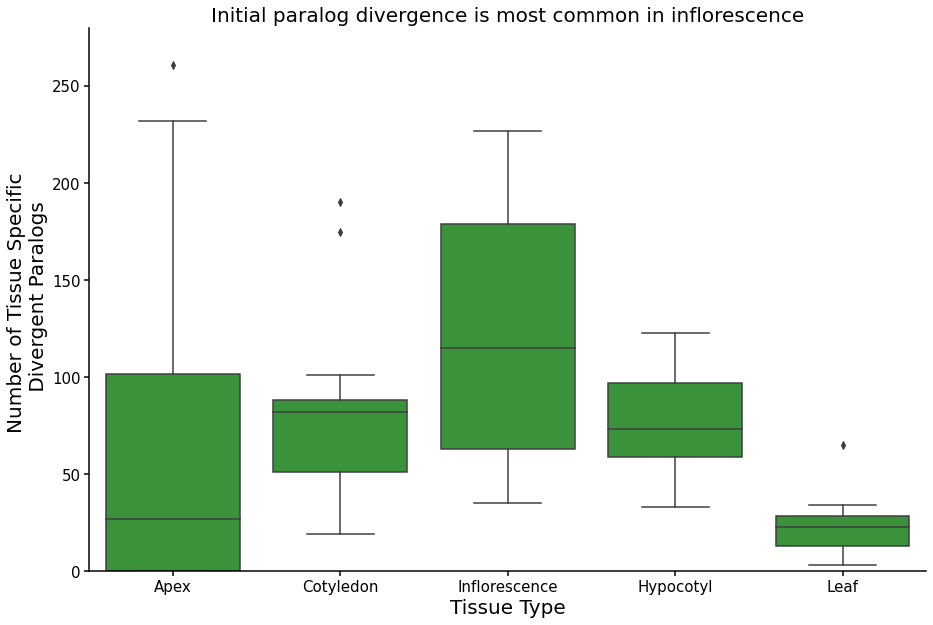

In [35]:
fig, ax = plt.subplots(figsize = (15,10))
fig.patch.set_facecolor('white')
ax = sns.boxplot(data = summary_df, x = 'Tissue',y ="Number of Tissue Specific Divergent Paralogs" , color= 'tab:green' , )
plt.ylabel("Number of Tissue Specific \n Divergent Paralogs", fontsize = 20)
plt.xlabel("Tissue Type", fontsize = 20)
plt.ylim((0,280))
sns.despine()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_linewidth(1.5)
ax.spines["left"].set_color("black")
ax.xaxis.set_tick_params(width=1.5, length = 5)
ax.yaxis.set_tick_params(width=1.5, length = 5)
plt.title("Initial paralog divergence is most common in inflorescence", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('/data/passala/for_hamsini/Figs_for_pan_sol/Initial_paralog_divergence.pdf',dpi = 900)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

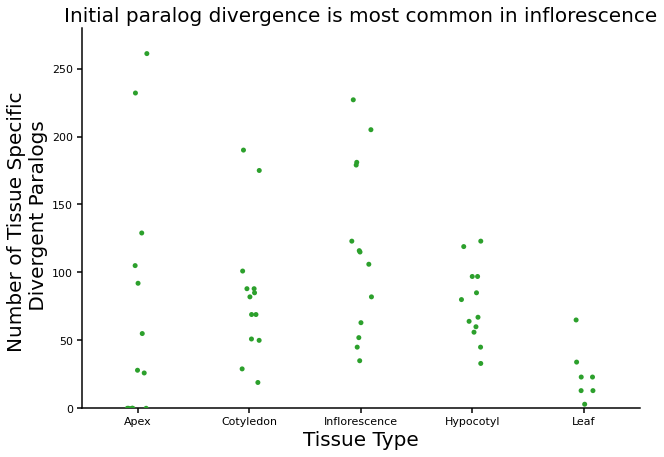

In [214]:
fig, ax = plt.subplots(figsize = (10,7))
fig.patch.set_facecolor('white')
ax = sns.stripplot(data = summary_df, x = 'Tissue',y ="Number of Tissue Specific Divergent Paralogs" , color= 'tab:green' , )
plt.ylabel("Number of Tissue Specific \n Divergent Paralogs", fontsize = 20)
plt.xlabel("Tissue Type", fontsize = 20)
plt.ylim((0,280))
sns.despine()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_linewidth(1.5)
ax.spines["left"].set_color("black")
ax.xaxis.set_tick_params(width=1.5, length = 5)
ax.yaxis.set_tick_params(width=1.5, length = 5)
plt.title("Initial paralog divergence is most common in inflorescence", fontsize = 20)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

In [78]:
identification_of_threshold_df["Fold Change"].median()

0.1562199809876521

In [83]:
identification_of_threshold_df["Fold Change"].quantile(0.9)

1.7027674974494604

In [3]:
ortho_col_name_converter = {
    "Aethiopicum": "Solaet3_3.0.4",
    "Candidum": "Solcan1_1.0.4",
    "Macrocarpon": "Solmac3_3.0.4",
    "Muricatum 1": "Solmur2hap1_2.0.4",
    "Muricatum 2": "Solmur2hap2_2.0.4",
    "Prinophyllum": "Solpri1_2.0.4",
    "Quitoense": "Solqui2_2.0.4",
}
ortho_group_dictionary_of_gene_groups = {}
for species in ortho_col_name_converter.keys():
    current_ortho_df = orthogroups[["Orthogroup", ortho_col_name_converter[species]]]
    current_ortho_df = current_ortho_df.dropna()
    df_conversion_base = []
    list_of_lenghts = []
    for Orthogroup_row in current_ortho_df.iterrows():
        current_orthogroup = Orthogroup_row[1][0]
        current_list_of_genes_in_group = (
            Orthogroup_row[1][1].replace(" ", "").split(",")
        )
        list_of_lenghts.append(len(current_list_of_genes_in_group))
        if (
            len(current_list_of_genes_in_group) > 2
            or len(current_list_of_genes_in_group) == 1
        ):
            continue
        orthogroup_list = [current_orthogroup] * len(current_list_of_genes_in_group)
        zipped_list = zip(orthogroup_list, current_list_of_genes_in_group)
        df_conversion_base.extend(list(zipped_list))
        final_long_df = pd.DataFrame(
            data=df_conversion_base, columns=["Orthogroup", "Gene"]
        )
        ortho_group_dictionary_of_gene_groups[species] = final_long_df

In [4]:
ortho_group_dictionary_of_gene_groups["Muricatum 1"]

,Orthogroup,Gene
0,OG0000028,Solmur2hap1.08g004330.1
1,OG0000028,Solmur2hap1.10g010550.1
2,OG0000100,Solmur2hap1.12g010720.1
3,OG0000100,Solmur2hap1.12g010760.1
4,OG0000115,Solmur2hap1.01g009230.1
...,...,...
5365,OG0044540,Solmur2hap1.11g018940.1
5366,OG0044629,Solmur2hap1.12g012320.1
5367,OG0044629,Solmur2hap1.12g012330.1
5368,OG0044700,Solmur2hap1.ctg00000072g000040.1


In [5]:
paralog_sets_wide = {}
for species in ortho_group_dictionary_of_gene_groups.keys():
    list_of_gene_pairs_in_ortho_group = []
    current_long_df = ortho_group_dictionary_of_gene_groups[species]
    for ortho in set(current_long_df["Orthogroup"]):
        matched_long_df = current_long_df.loc[current_long_df["Orthogroup"] == ortho]
        all_combinations_in_orthogroup = matched_long_df["Gene"].to_list()
        all_combinations_in_orthogroup.append(ortho)
        list_of_gene_pairs_in_ortho_group.append(all_combinations_in_orthogroup)
    ortho_gene_pairs_df = pd.DataFrame(
        data=list_of_gene_pairs_in_ortho_group,
        columns=["Alpha Gene", "Beta Gene", "Orthogroup"],
    )
    paralog_sets_wide[species] = ortho_gene_pairs_df

In [6]:
paralog_sets_wide.keys()

dict_keys(['Aethiopicum', 'Candidum', 'Macrocarpon', 'Muricatum 1', 'Muricatum 2', 'Prinophyllum', 'Quitoense'])

In [7]:
species_rna_locations = {
    "Aethiopicum": "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Aetheopicum/fpkm_normalized_combined_samples.tsv",
    "Candidum": "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Candidum/fpkm_normalized_combined_samples.tsv",
    "Macrocarpon": "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Macrocarpon/fpkm_normalized_combined_samples.tsv",
    "Muricatum 1": "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_1/fpkm_normalized_combined_samples.tsv",
    "Muricatum 2": "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_muricatum/haplotype_2/fpkm_normalized_combined_samples.tsv",
    "Prinophyllum": "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Prinophyllum/fpkm_normalized_combined_samples.tsv",
    "Quitoense": "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Initial_species_bulk_seq/Solanum_Quitoense/fpkm_normalized_combined_samples.tsv",
}

In [8]:
rna_normalized_data = {}
for species in species_rna_locations.keys():
    current_rna_location = species_rna_locations[species]
    current_sample = pd.read_csv(current_rna_location, sep="\t", index_col=0)
    current_sample.index = current_sample.index + ".1"
    current_sample["Mean"] = current_sample.mean(axis=1)

    rna_normalized_data[species] = current_sample

In [9]:
rna_normalized_data["Muricatum 2"]

,Rep 1,Rep 2,Mean
FEATURE_ID,,,
Solmur2hap2.Cg000010.1,0.027728,0.000000,0.013864
Solmur2hap2.Cg000020.1,0.000000,0.000000,0.000000
Solmur2hap2.Cg000030.1,0.237092,0.247302,0.242197
Solmur2hap2.Cg000040.1,0.000000,0.000000,0.000000
Solmur2hap2.Cg000050.1,0.000000,0.000000,0.000000
...,...,...,...
Solmur2hap2.ctg00000092g000280.1,0.000000,0.000000,0.000000
Solmur2hap2.ctg00000092g000290.1,0.000000,0.000000,0.000000
Solmur2hap2.ctg00000092g000300.1,0.000000,0.000000,0.000000


In [10]:
paralog_sets_wide["Muricatum 2"]

,Alpha Gene,Beta Gene,Orthogroup
0,Solmur2hap2.02g031380.1,Solmur2hap2.05g001420.1,OG0002076
1,Solmur2hap2.06g002170.1,Solmur2hap2.09g014910.1,OG0001919
2,Solmur2hap2.06g034420.1,Solmur2hap2.09g014790.1,OG0002829
3,Solmur2hap2.01g031440.1,Solmur2hap2.11g027070.1,OG0002366
4,Solmur2hap2.Mg001240.1,Solmur2hap2.Mg002070.1,OG0001124
...,...,...,...
2744,Solmur2hap2.08g011560.1,Solmur2hap2.12g022100.1,OG0002658
2745,Solmur2hap2.08g007280.1,Solmur2hap2.12g002060.1,OG0004192
2746,Solmur2hap2.03g025950.1,Solmur2hap2.12g002540.1,OG0002785
2747,Solmur2hap2.11g006820.1,Solmur2hap2.12g020040.1,OG0005480


In [11]:
paralog_rep_expression = {}
for species in paralog_sets_wide.keys():
    orthology_df = paralog_sets_wide[species]
    rna_data = rna_normalized_data[species]
    merged_alpha_gene = orthology_df.merge(
        right=rna_data[["Mean"]], left_on="Alpha Gene", right_index=True
    )
    merged_alpha_gene = merged_alpha_gene.rename(
        columns={"Mean": "Alpha Gene Mean Expression"}
    )
    paralog_difference_dataframe = merged_alpha_gene.merge(
        right=rna_data[["Mean"]], left_on="Beta Gene", right_index=True
    )
    paralog_difference_dataframe = paralog_difference_dataframe.rename(
        columns={"Mean": "Beta Gene Mean Expression"}
    )
    paralog_difference_dataframe["Log2 Fold Change"] = np.log2(
        (paralog_difference_dataframe["Alpha Gene Mean Expression"] + 1)
    ) - np.log2((paralog_difference_dataframe["Beta Gene Mean Expression"] + 1))
    paralog_rep_expression[species] = paralog_difference_dataframe

paralog_difference_dataframe

,Alpha Gene,Beta Gene,Orthogroup,Alpha Gene Mean Expression,Beta Gene Mean Expression,Log2 Fold Change
0,Solqui2.02g033170.1,Solqui2.02g033190.1,OG0004648,14.008023,19.941717,-0.480646
1,Solqui2.02g015460.1,Solqui2.05g003000.1,OG0002076,5.851748,8.669279,-0.496936
2,Solqui2.10g012890.1,Solqui2.10g015510.1,OG0005262,0.118853,0.609063,-0.524200
3,Solqui2.07g028050.1,Solqui2.10g000880.1,OG0003788,63.657253,137.684580,-1.100923
4,Solqui2.06g001680.1,Solqui2.09g015180.1,OG0001919,0.172329,0.285925,-0.133430
...,...,...,...,...,...,...
2798,Solqui2.08g016540.1,Solqui2.12g019690.1,OG0002658,14.028878,117.048486,-2.973570
2799,Solqui2.03g023670.1,Solqui2.06g026420.1,OG0002963,16.671259,41.941842,-1.280979
2800,Solqui2.03g002090.1,Solqui2.03g031420.1,OG0002785,29.919987,32.588282,-0.119418
2801,Solqui2.06g025720.1,Solqui2.06g026030.1,OG0008568,0.000000,4.113977,-2.354446


In [12]:
import pickle

file = open(
    "/data/passala/Generated_Tables/Temp_junk/quitoense_tidy_plotter_for_background.p",
    "rb",
)
quitoense_background = pickle.load(file)
quitoense_background[
    "Gene Relationship"
] = "Example Between Replicates - Single Measurement"
quitoense_background

,Log2 Fold Change,Gene Relationship
FEATURE_ID,,
Solqui2.Cg000010.1,0.166877,Example Between Replicates - Single Measurement
Solqui2.Cg000020.1,-0.044859,Example Between Replicates - Single Measurement
Solqui2.Cg000050.1,-0.450841,Example Between Replicates - Single Measurement
Solqui2.Cg000060.1,-0.086182,Example Between Replicates - Single Measurement
Solqui2.Cg000070.1,-0.108137,Example Between Replicates - Single Measurement
...,...,...
Solqui2.ctg00000691g000010.1,-0.073952,Example Between Replicates - Single Measurement
ncRNA_Solqui2.ctg00000739g003721.1,1.679501,Example Between Replicates - Single Measurement
ncRNA_Solqui2.ctg00000739g003731.1,0.079138,Example Between Replicates - Single Measurement


In [13]:
np.percentile(abs(quitoense_background["Log2 Fold Change"]), 99.9)

4.304825783599234

In [14]:
tidy_formatted_expression = {}
for species in paralog_rep_expression.keys():
    current_wide_df = paralog_rep_expression[species]
    fold_change_tidy_plotter = pd.DataFrame(
        data=current_wide_df["Log2 Fold Change"], columns=["Log2 Fold Change"]
    )
    fold_change_tidy_plotter["Gene Relationship"] = (
        species + " - Between Paralogs - Mean of Available Replicates"
    )
    fold_change_tidy_plotter = pd.concat(
        [fold_change_tidy_plotter, quitoense_background], ignore_index=True
    )
    tidy_formatted_expression[species] = fold_change_tidy_plotter

In [15]:
tidy_formatted_expression["Aethiopicum"]

,Log2 Fold Change,Gene Relationship
0,-0.037069,Aethiopicum - Between Paralogs - Mean of Avail...
1,-0.591939,Aethiopicum - Between Paralogs - Mean of Avail...
2,-0.593442,Aethiopicum - Between Paralogs - Mean of Avail...
3,5.778971,Aethiopicum - Between Paralogs - Mean of Avail...
4,0.714063,Aethiopicum - Between Paralogs - Mean of Avail...
...,...,...
29470,-0.073952,Example Between Replicates - Single Measurement
29471,1.679501,Example Between Replicates - Single Measurement
29472,0.079138,Example Between Replicates - Single Measurement
29473,0.557616,Example Between Replicates - Single Measurement


In [16]:
tidy_formatted_expression["Macrocarpon"]

,Log2 Fold Change,Gene Relationship
0,-2.454643,Macrocarpon - Between Paralogs - Mean of Avail...
1,0.590132,Macrocarpon - Between Paralogs - Mean of Avail...
2,-1.086030,Macrocarpon - Between Paralogs - Mean of Avail...
3,-1.162551,Macrocarpon - Between Paralogs - Mean of Avail...
4,0.171792,Macrocarpon - Between Paralogs - Mean of Avail...
...,...,...
29407,-0.073952,Example Between Replicates - Single Measurement
29408,1.679501,Example Between Replicates - Single Measurement
29409,0.079138,Example Between Replicates - Single Measurement
29410,0.557616,Example Between Replicates - Single Measurement


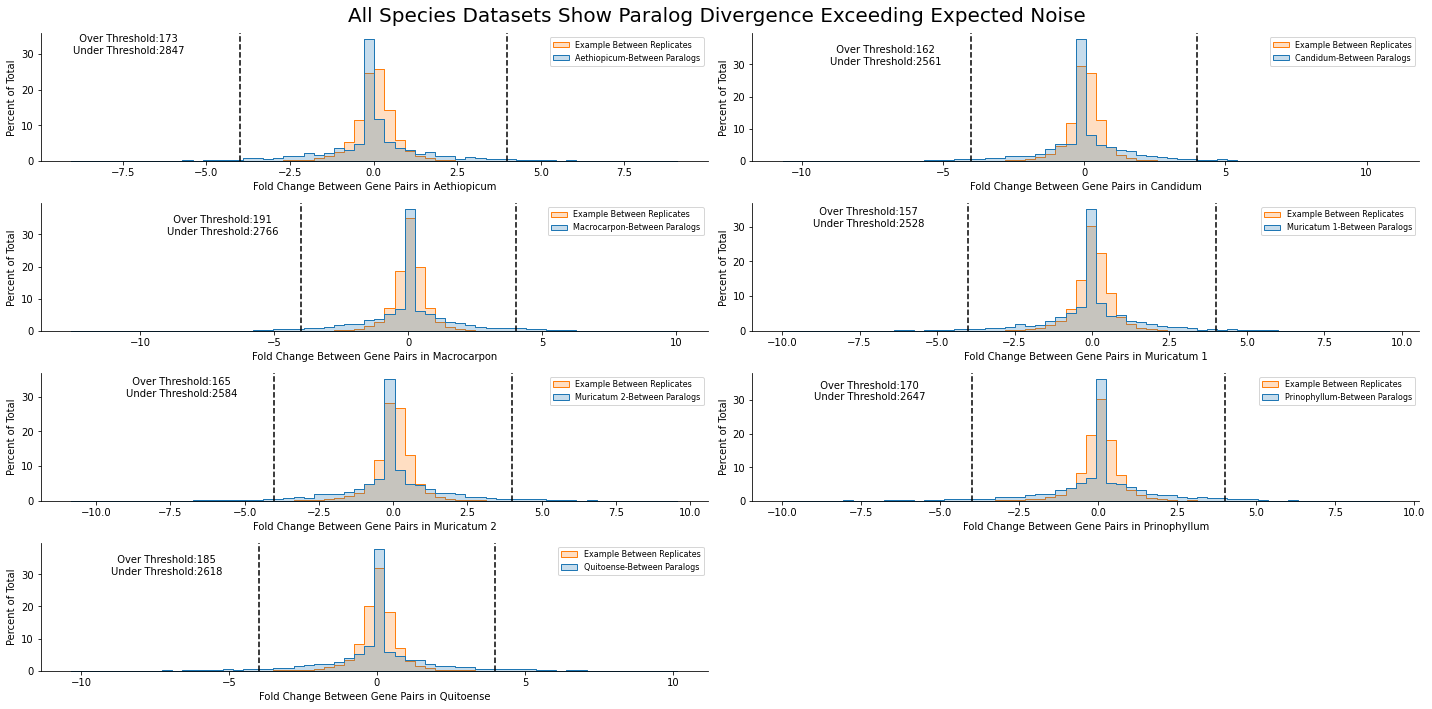

In [17]:
fig, ax = plt.subplots(4, 2, figsize=(20, 10))
fig.patch.set_facecolor("white")
fig.delaxes(ax[3, 1])  # The indexing is zero-based here
fig.suptitle(
    "All Species Datasets Show Paralog Divergence Exceeding Expected Noise", fontsize=20
)
for axes, species in zip(ax.flat, tidy_formatted_expression.keys()):
    fold_change_tidy_plotter = tidy_formatted_expression[species]
    subplot = sns.histplot(
        ax=axes,
        data=fold_change_tidy_plotter,
        x="Log2 Fold Change",
        hue="Gene Relationship",
        bins=60,
        element="step",
        stat="percent",
        common_norm=False,
    )
    axes.axvline(x=4, color="k", linestyle="--")
    axes.axvline(x=-4, color="k", linestyle="--")
    axes.set_ylabel("Percent of Total", fontsize=10)
    axes.set_xlabel(f"Fold Change Between Gene Pairs in {species}", fontsize=10)
    sns.despine()
    legend_strings = ["Example Between Replicates", f"{species}-Between Paralogs"]
    axes.legend(legend_strings, fontsize=8)
    subplot.grid(False)
    subplot.spines["bottom"].set_color("black")
    subplot.spines["left"].set_color("black")
    length_of_over_threshold = len(
        fold_change_tidy_plotter.loc[
            (fold_change_tidy_plotter["Log2 Fold Change"] > 4)
            | (fold_change_tidy_plotter["Log2 Fold Change"] < -4)
        ].loc[fold_change_tidy_plotter["Gene Relationship"].str.contains("Paralogs")]
    )
    length_of_under_threshold = len(
        fold_change_tidy_plotter.loc[
            (fold_change_tidy_plotter["Log2 Fold Change"] < 4)
            & (fold_change_tidy_plotter["Log2 Fold Change"] > -4)
        ].loc[fold_change_tidy_plotter["Gene Relationship"].str.contains("Paralogs")]
    )
    axes.text(
        -9,
        30,
        f"  Over Threshold:{length_of_over_threshold}\nUnder Threshold:{length_of_under_threshold}",
        fontsize=10,
    )
    plt.tight_layout()
    # axes.set_xlim((-8,8))
    # axes.set_ylim((0, 40))
    # plt.title("Current Threshold is 31", fontsize = 20)
    # plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
    # plt.yticks(fontsize = 11)

In [18]:
 length_of_under_threshold = len(fold_change_tidy_plotter.loc[(fold_change_tidy_plotter['Log2 Fold Change'] < 4)|(fold_change_tidy_plotter['Log2 Fold Change']>-4)].loc[fold_change_tidy_plotter['Gene Relationship'].str.contains('Paralogs')])

In [19]:
orthogroup_occurence_of_paralog_changes = orthogroups[["Orthogroup"]]
orthogroup_occurence_of_paralog_changes["Number of Divergent Paralogs"] = 0
orthogroup_occurence_of_paralog_changes

/tmp/ipykernel_989180/501343875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orthogroup_occurence_of_paralog_changes['Number of Divergent Paralogs'] = 0


,Orthogroup,Number of Divergent Paralogs
0,OG0000000,0
1,OG0000001,0
2,OG0000002,0
3,OG0000003,0
4,OG0000004,0
...,...,...
45018,OG0045018,0
45019,OG0045019,0
45020,OG0045020,0
45021,OG0045021,0


In [20]:
paralog_rep_expression.keys()

dict_keys(['Aethiopicum', 'Candidum', 'Macrocarpon', 'Muricatum 1', 'Muricatum 2', 'Prinophyllum', 'Quitoense'])

In [21]:
diverged_paralogs_by_species = {}
for species in paralog_rep_expression.keys():
    divergent_paralogs = paralog_rep_expression[species].loc[
        (paralog_rep_expression[species]["Log2 Fold Change"] > 4)
        | (paralog_rep_expression[species]["Log2 Fold Change"] < -4)
    ]
    diverged_paralogs_by_species[species] = divergent_paralogs
    list_of_divergent_paralogs = divergent_paralogs["Orthogroup"].to_list()
    orthogroup_occurence_of_paralog_changes["Number of Divergent Paralogs"].loc[
        orthogroup_occurence_of_paralog_changes["Orthogroup"].isin(
            list_of_divergent_paralogs
        )
    ] = (
        orthogroup_occurence_of_paralog_changes["Number of Divergent Paralogs"].loc[
            orthogroup_occurence_of_paralog_changes["Orthogroup"].isin(
                list_of_divergent_paralogs
            )
        ]
        + 1
    )
    orthogroup_occurence_of_paralog_changes[species] = False
    orthogroup_occurence_of_paralog_changes[species].loc[
        orthogroup_occurence_of_paralog_changes["Orthogroup"].isin(
            list_of_divergent_paralogs
        )
    ] = True

/tmp/ipykernel_989180/3085157011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orthogroup_occurence_of_paralog_changes['Number of Divergent Paralogs'].loc[orthogroup_occurence_of_paralog_changes['Orthogroup'].isin(list_of_divergent_paralogs)] = orthogroup_occurence_of_paralog_changes['Number of Divergent Paralogs'].loc[orthogroup_occurence_of_paralog_changes['Orthogroup'].isin(list_of_divergent_paralogs)]+1
/tmp/ipykernel_989180/3085157011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orthogroup_occurence_of_paralog_changes[species] = False
/tmp/ipyke

In [22]:
orthogroup_occurence_of_paralog_changes

,Orthogroup,Number of Divergent Paralogs,Aethiopicum,Candidum,Macrocarpon,Muricatum 1,Muricatum 2,Prinophyllum,Quitoense
0,OG0000000,0,False,False,False,False,False,False,False
1,OG0000001,0,False,False,False,False,False,False,False
2,OG0000002,0,False,False,False,False,False,False,False
3,OG0000003,0,False,False,False,False,False,False,False
4,OG0000004,0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
45018,OG0045018,0,False,False,False,False,False,False,False
45019,OG0045019,0,False,False,False,False,False,False,False
45020,OG0045020,0,False,False,False,False,False,False,False
45021,OG0045021,0,False,False,False,False,False,False,False


In [23]:
list(paralog_rep_expression.keys())

['Aethiopicum',
 'Candidum',
 'Macrocarpon',
 'Muricatum 1',
 'Muricatum 2',
 'Prinophyllum',
 'Quitoense']

In [24]:
import upsetplot

df_for_upset_plot = upsetplot.from_indicators(
    list(paralog_rep_expression.keys()), data=orthogroup_occurence_of_paralog_changes
)

In [25]:
df_for_upset_plot.reorder_levels(
    [
        "Muricatum 1",
        "Muricatum 2",
        "Quitoense",
        "Candidum",
        "Macrocarpon",
        "Aethiopicum",
        "Prinophyllum",
    ]
)

Orthogroup  \
Muricatum 1 Muricatum 2 Quitoense Candidum Macrocarpon Aethiopicum Prinophyllum              
False       False       False     False    False       False       False         OG0000000   
                                                                   False         OG0000001   
                                                                   False         OG0000002   
                                                                   False         OG0000003   
                                                                   False         OG0000004   
...                                                                                    ...   
                                                                   False         OG0045018   
                                                                   False         OG0045019   
                                                                   False         OG0045020   
                                                                   False         OG0045021   
                                                                   False         OG0045022   

                                                                                 Number of Divergent Paralogs  \
Muricatum 1 Muricatum 2 Quitoense Candidum Macrocarpon Aethiopicum Prinophyllum                                 
False       False       False     False    False       False       False                                    0   
                                                                   False                                    0   
                                                                   False                                    0   
                                                                   False                                    0   
                                                                   False                                    0   
...                                                                                                       ...   
                                                                   False                                    0   
                                                                   False                                    0   
                                                                   False                                    0   
                                                                   False                                    0   
                                                                   False                                    0   

                                                                                 Aethiopicum  \
Muricatum 1 Muricatum 2 Quitoense Candidum Macrocarpon Aethiopicum Prinophyllum                
False       False       False     False    False       False       False               False   
                                                                   False               False   
                                                                   False               False   
                                                                   False               False   
                                                                   False               False   
...                                                                                      ...   
                                                                   False               False   
                                                                   False               False   
                                                                   False               False   
                                                                   False               False   
                                                                   False               False   

                                                                                 Candidum  \
Muricatum 1 Muricatum 2 Quitoense Candidum Ma

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

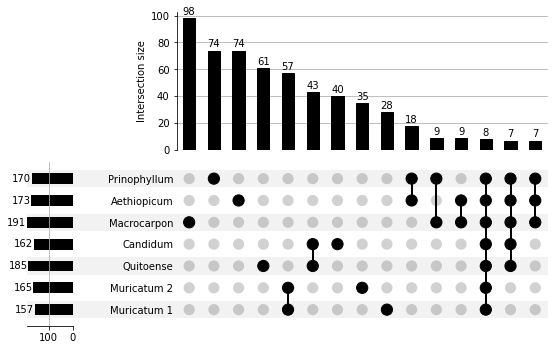

In [26]:
upsetplot.UpSet(
    df_for_upset_plot.reorder_levels(
        [
            "Muricatum 1",
            "Muricatum 2",
            "Quitoense",
            "Candidum",
            "Macrocarpon",
            "Aethiopicum",
            "Prinophyllum",
        ]
    ),
    min_subset_size=7,
    show_counts=True,
    max_subset_size=500,
    sort_by="cardinality",
    sort_categories_by=None,
).plot()

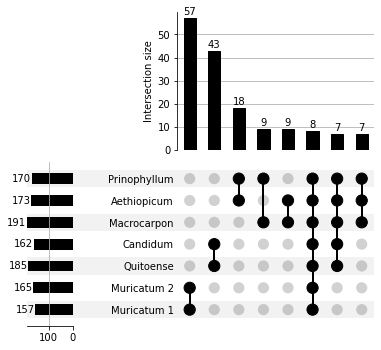

In [33]:
upsetplot.UpSet(
    df_for_upset_plot.reorder_levels(
        [
            "Muricatum 1",
            "Muricatum 2",
            "Quitoense",
            "Candidum",
            "Macrocarpon",
            "Aethiopicum",
            "Prinophyllum",
        ]
    ),
    min_subset_size=7,
    show_counts=True,
    max_subset_size=500,
    sort_by="cardinality",
    sort_categories_by=None,
    min_degree=2,
).plot()
plt.savefig(
    "/data/passala/Plots_for_projects/Zach_solanum/normal_order_upsetPlot.pdf", dpi=700
)

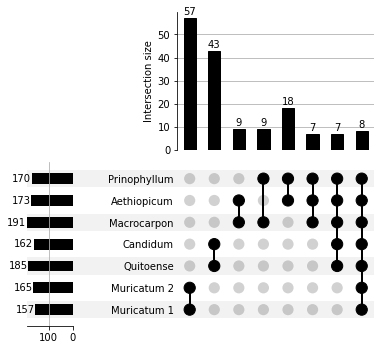

In [34]:
upsetplot.UpSet(
    df_for_upset_plot.reorder_levels(
        [
            "Muricatum 1",
            "Muricatum 2",
            "Quitoense",
            "Candidum",
            "Macrocarpon",
            "Aethiopicum",
            "Prinophyllum",
        ]
    ),
    min_subset_size=7,
    show_counts=True,
    max_subset_size=500,
    sort_by="degree",
    sort_categories_by=None,
    min_degree=2,
).plot()
plt.savefig(
    "/data/passala/Plots_for_projects/Zach_solanum/modified_order_upsetPlot.pdf",
    dpi=700,
)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

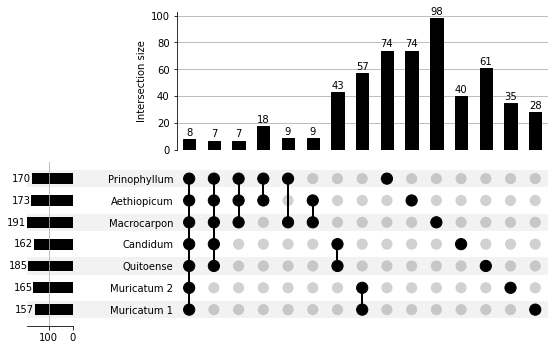

In [27]:
upsetplot.UpSet(
    df_for_upset_plot.reorder_levels(
        [
            "Muricatum 1",
            "Muricatum 2",
            "Quitoense",
            "Candidum",
            "Macrocarpon",
            "Aethiopicum",
            "Prinophyllum",
        ]
    ),
    min_subset_size=7,
    show_counts=True,
    max_subset_size=500,
    sort_by="-degree",
    sort_categories_by=None,
).plot()

In [28]:
orthogroup_occurence_of_paralog_changes["Number of Divergent Paralogs"].value_counts()

0    44337
1      410
2      167
3       40
4       31
5       21
6        9
7        8
Name: Number of Divergent Paralogs, dtype: int64

In [33]:
groups_that_are_always_divergent = orthogroup_occurence_of_paralog_changes.loc[
    orthogroup_occurence_of_paralog_changes["Number of Divergent Paralogs"] == 1
]["Orthogroup"].to_list()

In [34]:
orthogroups.loc[orthogroups["Orthogroup"].isin(groups_that_are_always_divergent)]

,Orthogroup,SlycHeinz4.0,Smel4.1,Solabu2_1.0.4,Solaet3_3.0.4,Solcan1_1.0.4,Solcle2_1.0.4,Soletu1_1.0.4,Solgig1_1.0.4,Sollin1_1.0.4,SollycM82_1.0.4,SollycSweet-100_2.0.4,Solmac3_3.0.4,Solmur2hap1_2.0.4,Solmur2hap2_2.0.4,Solpri1_2.0.4,Solqui2_2.0.4,Solrob1_1.0.4
219,OG0000219,"Solyc01g066612.1.1, Solyc01g066616.1.1, Solyc0...","SMEL4.1_06g006100.1.01, SMEL4.1_07g011890.1.01","Solabu2.05g013420.1, Solabu2.08g008840.1, Sola...","Solaet3.01g012460.1, Solaet3.01g020030.1, Sola...","Solcan1.02g025410.1, Solcan1.02g025420.1, Solc...","Solcle2.06g005940.1, Solcle2.07g013550.1, Solc...","Soletu1.03g012060.1, Soletu1.04g006610.1, Sole...",Solgig1.07g012620.1,"Sollin1.04g009840.1, Sollin1.06g007390.1, Soll...","SollycM82.01g017180.1, SollycM82.01g017200.1, ...","SollycSweet-100.01g016880.1, SollycSweet-100.0...","Solmac3.06g009960.1, Solmac3.07g016110.1, Solm...","Solmur2hap1.01g022110.1, Solmur2hap1.03g025050...","Solmur2hap2.02g006290.1, Solmur2hap2.03g025290...","Solpri1.06g006120.1, Solpri1.06g007710.1, Solp...","Solqui2.02g025780.1, Solqui2.06g019640.1",Solrob1.09g019310.1
336,OG0000336,"Solyc00g500034.1.1, Solyc00g500153.1.1, Solyc0...","SMEL4.1_00g012380.1.01, SMEL4.1_03g010220.1.01...",Solabu2.Cg000580.1,"Solaet3.04g008730.1, Solaet3.05g014270.1, Sola...","Solcan1.04g018550.1, Solcan1.05g016310.1, Solc...","Solcle2.06g008500.1, Solcle2.07g023240.1, Solc...","Soletu1.04g009060.1, Soletu1.04g009450.1, Sole...","Solgig1.02g002920.1, Solgig1.10g011550.1, Solg...","Sollin1.04g020920.1, Sollin1.05g019110.1, Soll...",SollycM82.09g011760.1,"SollycSweet-100.09g011610.1, SollycSweet-100.C...","Solmac3.01g016670.1, Solmac3.04g015020.1, Solm...","Solmur2hap1.08g009040.1, Solmur2hap1.Cg000540.1","Solmur2hap2.01g010050.1, Solmur2hap2.01g011710...","Solpri1.02g007240.1, Solpri1.04g008140.1, Solp...","Solqui2.04g019930.1, Solqui2.05g018220.1, Solq...","Solrob1.05g015910.1, Solrob1.09g013290.1, Solr..."
344,OG0000344,Solyc08g048455.1.1,"SMEL4.1_01g030210.1.01, SMEL4.1_01g031660.1.01...","Solabu2.01g012240.1, Solabu2.02g007690.1, Sola...","Solaet3.01g007930.1, Solaet3.01g008630.1, Sola...","Solcan1.03g006060.1, Solcan1.07g019730.1, Solc...","Solcle2.01g006650.1, Solcle2.01g007830.1, Solc...","Soletu1.03g011150.1, Soletu1.04g011280.1, Sole...","Solgig1.01g006230.1, Solgig1.01g008340.1, Solg...","Sollin1.01g007670.1, Sollin1.01g007720.1, Soll...",SollycM82.08g007640.1,"SollycSweet-100.03g012210.1, SollycSweet-100.0...","Solmac3.01g007150.1, Solmac3.01g007160.1, Solm...","Solmur2hap1.09g005970.1, Solmur2hap1.11g013920.1","Solmur2hap2.04g000170.1, Solmur2hap2.06g017680.1","Solpri1.01g007240.1, Solpri1.01g007270.1, Solp...","Solqui2.01g010230.1, Solqui2.03g006060.1, Solq...","Solrob1.01g007220.1, Solrob1.01g007970.1, Solr..."
360,OG0000360,"Solyc12g038860.1.1, Solyc12g098780.2.1, Solyc1...","SMEL4.1_00g008580.1.01, SMEL4.1_05g022410.1.01...","Solabu2.09g025710.1, Solabu2.12g020530.1, Sola...","Solaet3.12g028980.1, Solaet3.12g028990.1, Sola...","Solcan1.09g029190.1, Solcan1.12g021540.1, Solc...","Solcle2.12g023740.1, Solcle2.12g023770.1, Solc...","Soletu1.12g012780.1, Soletu1.12g012870.1, Sole...","Solgig1.12g027100.1, Solgig1.12g027130.1, Solg...","Sollin1.09g027820.1, Sollin1.12g026890.1, Soll...","SollycM82.12g015820.1, SollycM82.12g026230.1, ...","SollycSweet-100.12g015780.1, SollycSweet-100.1...","Solmac3.09g030130.1, Solmac3.12g027860.1","Solmur2hap1.12g017980.1, Solmur2hap1.12g023420...","Solmur2hap2.09g026740.1, Solmur2hap2.12g018770...","Solpri1.09g027330.1, Solpri1.12g027530.1, Solp...","Solqui2.09g028770.1, Solqui2.12g021890.1, Solq...","Solrob1.12g015330.1, Solrob1.12g015360.1, Solr..."
395,OG0000395,"Solyc09g083430.3.1, Solyc09g083435.1.1, Solyc0...","SMEL4.1_09g020830.1.01, SMEL4.1_09g020840.1.01...","Solabu2.09g020950.1, Solabu2.09g020960.1, Sola...","Solaet3.09g024160.1, Solaet3.09g024170.1, Sola...",Solcan1.09g024420.1,NaN,"Soletu1.09g019480.1, Soletu1.09g019490.1, Sole...","Solgig1.09g024620.1, Solgig1.09g024650.1","Sollin1.09g023190.1,

In [35]:
diverged_paralogs_by_species["Macrocarpon"]

,Alpha Gene,Beta Gene,Orthogroup,Alpha Gene Mean Expression,Beta Gene Mean Expression,Log2 Fold Change
4,Solmac3.05g010930.1,Solmac3.09g015990.1,OG0004487,17.820450,0.000000,4.234229
17,Solmac3.08g002490.1,Solmac3.08g018430.1,OG0003182,0.000000,35.178211,-5.177049
23,Solmac3.01g003630.1,Solmac3.01g003820.1,OG0008755,0.395796,164.466193,-6.889305
87,Solmac3.02g013540.1,Solmac3.03g001020.1,OG0002063,28.939827,0.088183,4.782072
93,Solmac3.04g028930.1,Solmac3.12g002130.1,OG0001666,0.488522,41.908333,-4.849306
...,...,...,...,...,...,...
2781,Solmac3.09g024830.1,Solmac3.12g007570.1,OG0002989,137.203045,4.603607,4.624290
2803,Solmac3.07g014730.1,Solmac3.07g026790.1,OG0002472,0.000000,48.649977,-5.633721
2892,Solmac3.02g002540.1,Solmac3.02g016710.1,OG0002046,26.787973,0.079667,4.685803
2954,Solmac3.04g014530.1,Solmac3.05g021290.1,OG0004683,30.890979,0.000000,4.995076


In [36]:
hamsini_paralog_scores = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/tomato_atlas_DGD_paralogs.csv"
)
tomato_table = orthogroups[["Orthogroup", "SlycHeinz4.0"]]
tomato_table = tomato_table.dropna()
tomato_table

,Orthogroup,SlycHeinz4.0
3,OG0000003,Solyc02g004000.1.1
5,OG0000005,Solyc02g030550.1.1
6,OG0000006,"Solyc01g014055.1.1, Solyc01g056575.1.1, Solyc0..."
8,OG0000008,"Solyc01g011356.1.1, Solyc02g037545.1.1, Solyc0..."
9,OG0000009,"Solyc08g061710.3.1, Solyc08g061720.1.1, Solyc0..."
...,...,...
38715,OG0038715,Solyc12g044170.1.1
38716,OG0038716,Solyc12g049618.1.1
38717,OG0038717,Solyc12g150129.1.1
38718,OG0038718,Solyc12g098720.3.1


In [37]:
df_conversion_base = []
list_of_lenghts = []
for Orthogroup_row in tomato_table.iterrows():
    current_orthogroup = Orthogroup_row[1][0]
    current_list_of_genes_in_group = Orthogroup_row[1][1].replace(" ", "").split(",")
    list_of_lenghts.append(len(current_list_of_genes_in_group))
    if (
        len(current_list_of_genes_in_group) > 4
        or len(current_list_of_genes_in_group) == 1
    ):
        continue
    orthogroup_list = [current_orthogroup] * len(current_list_of_genes_in_group)
    zipped_list = zip(orthogroup_list, current_list_of_genes_in_group)
    df_conversion_base.extend(list(zipped_list))

In [38]:
tomato_long = pd.DataFrame(data=df_conversion_base, columns=["Orthogroup", "Gene"])
tomato_long

,Orthogroup,Gene
0,OG0000024,Solyc06g008368.1.1
1,OG0000024,Solyc06g008785.1.1
2,OG0000035,Solyc04g150151.1.1
3,OG0000035,Solyc04g150152.1.1
4,OG0000035,Solyc04g150154.1.1
...,...,...
6770,OG0038467,Solyc01g150153.1.1
6771,OG0038488,Solyc02g088950.3.1
6772,OG0038488,Solyc02g088980.3.1
6773,OG0038616,Solyc08g044300.1.1


In [39]:
tomato_long["Gene"] = tomato_long["Gene"].str.split(".").str[0]

In [40]:
tomato_long

,Orthogroup,Gene
0,OG0000024,Solyc06g008368
1,OG0000024,Solyc06g008785
2,OG0000035,Solyc04g150151
3,OG0000035,Solyc04g150152
4,OG0000035,Solyc04g150154
...,...,...
6770,OG0038467,Solyc01g150153
6771,OG0038488,Solyc02g088950
6772,OG0038488,Solyc02g088980
6773,OG0038616,Solyc08g044300


In [50]:
# high_quality_paralogs = hamsini_paralog_scores.loc[hamsini_paralog_scores['fc_top10'] >.9]
gene1_high_quality_paralogs = hamsini_paralog_scores.merge(
    tomato_long, how="left", left_on="Gene1", right_on="Gene"
)
gene1_high_quality_paralogs = gene1_high_quality_paralogs.rename(
    columns={"Orthogroup": "Gene 1 Orthogroup", "Gene": "Gene 1 Gene"}
)
merged_high_quality_paralogs = gene1_high_quality_paralogs.merge(
    tomato_long, how="left", left_on="Gene2", right_on="Gene"
)
merged_high_quality_paralogs = merged_high_quality_paralogs.rename(
    columns={"Orthogroup": "Gene 2 Orthogroup", "Gene": "Gene 2 Gene"}
)
merged_high_quality_paralogs = merged_high_quality_paralogs.drop(
    columns=["Gene 1 Gene", "Gene 2 Gene"]
)
merged_high_quality_paralogs = merged_high_quality_paralogs.dropna(
    how="all", subset=["Gene 1 Orthogroup", "Gene 2 Orthogroup"]
)

In [51]:
merged_high_quality_paralogs.dropna(
    how="all", subset=["Gene 1 Orthogroup", "Gene 2 Orthogroup"]
)

,Gene1,Gene2,duptype,tpm_cordist,tpm_euc,log_euc,coexp,fc_top10,spec_top10,fc_homeo,spec_homeo,Gene 1 Orthogroup,Gene 2 Orthogroup
8,Solyc00g007080,Solyc02g082710,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0001849
13,Solyc00g007200,Solyc02g082430,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0002050
26,Solyc01g079540,Solyc01g100350,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0000578
28,Solyc01g079760,Solyc01g098910,WGD,0.510380,365.322010,10.701048,0.851030,0.875573,0.908611,0.565610,0.628951,OG0002019,OG0002019
30,Solyc01g079960,Solyc01g098770,WGD,1.098093,8.147057,3.380584,0.307888,0.149273,0.119959,0.386236,0.388662,OG0001390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34108,Solyc12g100030,Solyc06g008300,dispersed,1.045609,54.976674,8.112849,0.878649,0.818579,0.824382,NaN,NaN,OG0000663,OG0000842
34115,Solyc12g100170,Solyc06g066840,dispersed,0.939160,31.775099,4.779287,0.597692,0.556830,0.563391,NaN,NaN,NaN,OG0001109
34119,Solyc12g100240,Solyc01g006430,dispersed,0.854729,1237.243728,32.019349,0.527514,0.408087,0.427951,0.475699,0.392357,OG0003630,NaN
34120,Solyc12g100260,Solyc01g006430,dispersed,0.822797,1234.007865,30.999681,0.409578,0.331302,0.383885,NaN,NaN,OG0003630,NaN


In [52]:
full_merged_paralogs = merged_high_quality_paralogs.copy()

In [69]:
merged_high_quality_paralogs_ultra_high = merged_high_quality_paralogs.loc[
    merged_high_quality_paralogs["fc_top10"] > 0.9
]
merged_high_quality_paralogs_ultra_high = merged_high_quality_paralogs_ultra_high.loc[
    merged_high_quality_paralogs_ultra_high["spec_top10"] > 0.9
]
merged_high_quality_paralogs_ultra_high = merged_high_quality_paralogs_ultra_high.loc[
    merged_high_quality_paralogs_ultra_high["coexp"] > 0.95
]
orthogroups_with_high_quality_paralogs = list(
    set(merged_high_quality_paralogs_ultra_high["Gene 1 Orthogroup"].to_list()).union(
        set(merged_high_quality_paralogs_ultra_high["Gene 2 Orthogroup"])
    )
)

In [70]:
orthogroups_with_high_quality_paralogs.pop(0)

nan

In [71]:
len(orthogroups_with_high_quality_paralogs)

810

In [72]:
trimmed_to_high_quality_tomato_paralogs_diverged_paralogs = {}
for species in diverged_paralogs_by_species.keys():
    current_divergence = diverged_paralogs_by_species[species]
    diverged_paralogs_that_match_tomato_high_quality_paralog = current_divergence.loc[
        current_divergence["Orthogroup"].isin(orthogroups_with_high_quality_paralogs)
    ]
    diverged_paralogs_that_match_tomato_high_quality_paralog[
        "Min Expression"
    ] = diverged_paralogs_that_match_tomato_high_quality_paralog[
        ["Alpha Gene Mean Expression", "Beta Gene Mean Expression"]
    ].min(
        axis=1
    )
    trimmed_to_high_quality_tomato_paralogs_diverged_paralogs[
        species
    ] = diverged_paralogs_that_match_tomato_high_quality_paralog

/tmp/ipykernel_51126/1613525453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverged_paralogs_that_match_tomato_high_quality_paralog['Min Expression'] = diverged_paralogs_that_match_tomato_high_quality_paralog[['Alpha Gene Mean Expression','Beta Gene Mean Expression']].min(axis =1)
/tmp/ipykernel_51126/1613525453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverged_paralogs_that_match_tomato_high_quality_paralog['Min Expression'] = diverged_paralogs_that_match_tomato_high_quality_paralog[['A

In [80]:
trimmed_to_high_quality_tomato_paralogs_diverged_paralogs["Muricatum 2"].sort_values(
    by="Min Expression", ascending=False
).head(10)

,Alpha Gene,Beta Gene,Orthogroup,Alpha Gene Mean Expression,Beta Gene Mean Expression,Log2 Fold Change,Min Expression
481,Solmur2hap2.01g034460.1,Solmur2hap2.01g035630.1,OG0002368,55.292900,1181.167909,-4.392338,55.292900
2021,Solmur2hap2.06g023950.1,Solmur2hap2.06g023960.1,OG0001149,16.375719,4846.776696,-8.124107,16.375719
1329,Solmur2hap2.07g013920.1,Solmur2hap2.12g000640.1,OG0004466,302.178529,11.702393,4.576995,11.702393
922,Solmur2hap2.04g017440.1,Solmur2hap2.05g020480.1,OG0001407,469.749204,11.645662,5.218244,11.645662
2533,Solmur2hap2.01g040220.1,Solmur2hap2.01g040230.1,OG0003496,10.728683,203.200934,-4.121877,10.728683
1927,Solmur2hap2.01g022590.1,Solmur2hap2.07g017690.1,OG0001537,376.964530,9.825456,5.125751,9.825456
1780,Solmur2hap2.06g030930.1,Solmur2hap2.11g024720.1,OG0001928,9.507596,261.135096,-4.640806,9.507596
2221,Solmur2hap2.01g018650.1,Solmur2hap2.02g034090.1,OG0001041,316.427362,5.925536,5.518357,5.925536
2717,Solmur2hap2.02g007570.1,Solmur2hap2.02g024980.1,OG0004373,70.353427,3.140510,4.107102,3.140510
200,Solmur2hap2.11g009530.1,Solmur2hap2.11g009540.1,OG0004424,2.474477,149.355990,-5.435443,2.474477


In [81]:
merged_low_quality_paralogs = merged_high_quality_paralogs.loc[
    merged_high_quality_paralogs["coexp"] < 0.2
]

orthogroups_with_low_quality_paralogs = list(
    set(merged_low_quality_paralogs["Gene 1 Orthogroup"].to_list()).union(
        set(merged_low_quality_paralogs["Gene 2 Orthogroup"])
    )
)

In [83]:
orthogroups_with_low_quality_paralogs.pop(0)

nan

In [85]:
len(orthogroups_with_low_quality_paralogs)

556

In [130]:
undiverged_paralogs_by_species = {}
for species in paralog_rep_expression.keys():
    divergent_paralogs = paralog_rep_expression[species].loc[
        (paralog_rep_expression[species]["Log2 Fold Change"] < 0.25)
        & (paralog_rep_expression[species]["Log2 Fold Change"] > -0.25)
    ]
    undiverged_paralogs_by_species[species] = divergent_paralogs

In [131]:
trimmed_to_worst_tomato_duplicates = {}
for species in undiverged_paralogs_by_species.keys():
    current_divergence = undiverged_paralogs_by_species[species]
    diverged_paralogs_that_match_tomato_high_quality_paralog = current_divergence.loc[
        current_divergence["Orthogroup"].isin(orthogroups_with_low_quality_paralogs)
    ]
    diverged_paralogs_that_match_tomato_high_quality_paralog[
        "Min Expression"
    ] = diverged_paralogs_that_match_tomato_high_quality_paralog[
        ["Alpha Gene Mean Expression", "Beta Gene Mean Expression"]
    ].min(
        axis=1
    )
    trimmed_to_worst_tomato_duplicates[
        species
    ] = diverged_paralogs_that_match_tomato_high_quality_paralog

/tmp/ipykernel_51126/932600253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverged_paralogs_that_match_tomato_high_quality_paralog['Min Expression'] = diverged_paralogs_that_match_tomato_high_quality_paralog[['Alpha Gene Mean Expression','Beta Gene Mean Expression']].min(axis =1)
/tmp/ipykernel_51126/932600253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverged_paralogs_that_match_tomato_high_quality_paralog['Min Expression'] = diverged_paralogs_that_match_tomato_high_quality_paralog[['Alp

In [132]:
trimmed_to_worst_tomato_duplicates["Aethiopicum"].sort_values(
    by="Min Expression", ascending=False
).head(10)

,Alpha Gene,Beta Gene,Orthogroup,Alpha Gene Mean Expression,Beta Gene Mean Expression,Log2 Fold Change,Min Expression
2246,Solaet3.07g033010.1,Solaet3.11g013680.1,OG0001757,371.864723,401.666966,-0.110935,371.864723
1809,Solaet3.06g020940.1,Solaet3.06g021080.1,OG0002198,120.352170,123.415636,-0.035968,120.352170
1589,Solaet3.03g025350.1,Solaet3.06g028320.1,OG0002099,118.620974,100.010253,0.243969,100.010253
785,Solaet3.07g038330.1,Solaet3.11g024500.1,OG0002242,86.630845,91.789445,-0.082522,86.630845
1216,Solaet3.05g028300.1,Solaet3.07g038420.1,OG0001938,78.722874,92.766795,-0.234083,78.722874
1186,Solaet3.07g034400.1,Solaet3.11g023360.1,OG0002650,71.433374,75.319801,-0.075403,71.433374
264,Solaet3.01g016530.1,Solaet3.12g029670.1,OG0001465,40.849953,44.373385,-0.116620,40.849953
328,Solaet3.06g020380.1,Solaet3.08g000160.1,OG0002192,36.060979,42.281659,-0.223855,36.060979
2232,Solaet3.03g004130.1,Solaet3.03g004150.1,OG0003328,35.558854,38.921938,-0.126961,35.558854
2254,Solaet3.01g039110.1,Solaet3.10g014680.1,OG0002040,34.738749,35.381815,-0.025728,34.738749


In [133]:
trimmed_to_worst_tomato_duplicates["Aethiopicum"]

,Alpha Gene,Beta Gene,Orthogroup,Alpha Gene Mean Expression,Beta Gene Mean Expression,Log2 Fold Change,Min Expression
41,Solaet3.02g007930.1,Solaet3.07g024590.1,OG0001048,0.128456,0.076635,0.067821,0.076635
57,Solaet3.01g001200.1,Solaet3.05g004090.1,OG0002007,14.241621,14.524907,-0.026568,14.241621
143,Solaet3.04g003090.1,Solaet3.05g030980.1,OG0002463,6.996994,6.462013,0.099893,6.462013
198,Solaet3.08g017370.1,Solaet3.11g015230.1,OG0002659,6.807425,6.976690,-0.030943,6.807425
236,Solaet3.01g001600.1,Solaet3.05g004340.1,OG0002008,30.155077,35.133988,-0.213889,30.155077
...,...,...,...,...,...,...,...
2762,Solaet3.05g001910.1,Solaet3.05g002010.1,OG0002302,9.115595,7.788166,0.202947,7.788166
2837,Solaet3.02g020080.1,Solaet3.11g021940.1,OG0002769,27.972941,26.707445,0.064432,26.707445
2870,Solaet3.08g018600.1,Solaet3.08g018610.1,OG0005599,0.021125,0.000000,0.030160,0.000000
2909,Solaet3.03g032200.1,Solaet3.09g026070.1,OG0002114,21.241704,18.377415,0.198891,18.377415


In [ ]:
full_merged_paralogs

,Gene1,Gene2,duptype,tpm_cordist,tpm_euc,log_euc,coexp,fc_top10,spec_top10,fc_homeo,spec_homeo,Gene 1 Orthogroup,Gene 2 Orthogroup
8,Solyc00g007080,Solyc02g082710,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0001849
13,Solyc00g007200,Solyc02g082430,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0002050
26,Solyc01g079540,Solyc01g100350,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0000578
28,Solyc01g079760,Solyc01g098910,WGD,0.510380,365.322010,10.701048,0.851030,0.875573,0.908611,0.565610,0.628951,OG0002019,OG0002019
30,Solyc01g079960,Solyc01g098770,WGD,1.098093,8.147057,3.380584,0.307888,0.149273,0.119959,0.386236,0.388662,OG0001390,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34108,Solyc12g100030,Solyc06g008300,dispersed,1.045609,54.976674,8.112849,0.878649,0.818579,0.824382,NaN,NaN,OG0000663,OG0000842
34115,Solyc12g100170,Solyc06g066840,dispersed,0.939160,31.775099,4.779287,0.597692,0.556830,0.563391,NaN,NaN,NaN,OG0001109
34119,Solyc12g100240,Solyc01g006430,dispersed,0.854729,1237.243728,32.019349,0.527514,0.408087,0.427951,0.475699,0.392357,OG0003630,NaN
34120,Solyc12g100260,Solyc01g006430,dispersed,0.822797,1234.007865,30.999681,0.409578,0.331302,0.383885,NaN,NaN,OG0003630,NaN


In [ ]:
paralogs_with_aligned_orthogroups = full_merged_paralogs.loc[
    (full_merged_paralogs["Gene 1 Orthogroup"].isnull())
    | (full_merged_paralogs["Gene 1 Orthogroup"].isnull())
    | (
        full_merged_paralogs["Gene 2 Orthogroup"]
        == full_merged_paralogs["Gene 2 Orthogroup"]
    )
]

In [ ]:
full_merged_paralogs.loc[(full_merged_paralogs["Gene 1 Orthogroup"].isnull())]

,Gene1,Gene2,duptype,tpm_cordist,tpm_euc,log_euc,coexp,fc_top10,spec_top10,fc_homeo,spec_homeo,Gene 1 Orthogroup,Gene 2 Orthogroup
8,Solyc00g007080,Solyc02g082710,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0001849
13,Solyc00g007200,Solyc02g082430,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0002050
26,Solyc01g079540,Solyc01g100350,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0000578
49,Solyc01g108320,Solyc02g090450,WGD,0.001504,51.270741,3.547782,0.747325,0.799472,0.729765,0.517165,0.503538,NaN,OG0005393
51,Solyc01g108400,Solyc02g090510,WGD,1.352740,170.849707,15.223547,0.519090,0.503796,0.539091,0.530114,0.476687,NaN,OG0002383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34084,Solyc12g099530,Solyc04g026200,dispersed,0.890997,61.529888,4.092883,0.515733,0.532969,0.579738,NaN,NaN,NaN,OG0001753
34088,Solyc12g099580,Solyc12g035400,dispersed,0.140950,149.830974,6.927630,0.884345,0.956973,0.934848,NaN,NaN,NaN,OG0001228
34091,Solyc12g099630,Solyc10g011670,dispersed,0.323384,100.590829,10.515403,0.931012,0.907439,0.830545,0.725461,0.865859,NaN,OG0002029
34094,Solyc12g099690,Solyc12g099730,dispersed,NaN,4.309527,2.457353,0.500071,0.362384,0.056260,NaN,NaN,NaN,OG0004021


In [ ]:
paralogs_with_aligned_orthogroups[
    "Gene 1 Orthogroup"
] = paralogs_with_aligned_orthogroups["Gene 1 Orthogroup"].fillna(
    paralogs_with_aligned_orthogroups["Gene 2 Orthogroup"]
)
paralogs_with_aligned_orthogroups[
    "Gene 2 Orthogroup"
] = paralogs_with_aligned_orthogroups["Gene 2 Orthogroup"].fillna(
    paralogs_with_aligned_orthogroups["Gene 1 Orthogroup"]
)
paralogs_with_aligned_orthogroups

/tmp/ipykernel_40178/4270132114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paralogs_with_aligned_orthogroups['Gene 1 Orthogroup'] = paralogs_with_aligned_orthogroups['Gene 1 Orthogroup'].fillna(paralogs_with_aligned_orthogroups['Gene 2 Orthogroup'])
/tmp/ipykernel_40178/4270132114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paralogs_with_aligned_orthogroups['Gene 2 Orthogroup'] = paralogs_with_aligned_orthogroups['Gene 2 Orthogroup'].fillna(paralogs_with_aligned_orthogroups['Gene 1 Orthogro

,Gene1,Gene2,duptype,tpm_cordist,tpm_euc,log_euc,coexp,fc_top10,spec_top10,fc_homeo,spec_homeo,Gene 1 Orthogroup,Gene 2 Orthogroup
8,Solyc00g007080,Solyc02g082710,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0001849,OG0001849
13,Solyc00g007200,Solyc02g082430,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0002050,OG0002050
26,Solyc01g079540,Solyc01g100350,WGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG0000578,OG0000578
28,Solyc01g079760,Solyc01g098910,WGD,0.510380,365.322010,10.701048,0.851030,0.875573,0.908611,0.565610,0.628951,OG0002019,OG0002019
49,Solyc01g108320,Solyc02g090450,WGD,0.001504,51.270741,3.547782,0.747325,0.799472,0.729765,0.517165,0.503538,OG0005393,OG0005393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34103,Solyc12g099870,Solyc06g008270,dispersed,0.756491,0.856533,0.996906,0.897542,0.863179,0.827581,NaN,NaN,OG0000378,OG0000378
34105,Solyc12g099950,Solyc12g100030,dispersed,0.979236,25.509216,4.994255,0.641582,0.694411,0.788387,NaN,NaN,OG0000663,OG0000663
34106,Solyc12g100010,Solyc12g100030,dispersed,1.002737,33.742384,6.117557,0.870630,0.889590,0.859277,NaN,NaN,OG0000663,OG0000663
34108,Solyc12g100030,Solyc06g008300,dispersed,1.045609,54.976674,8.112849,0.878649,0.818579,0.824382,NaN,NaN,OG0000663,OG0000842


In [ ]:
paralog_rep_expression

{'Aetheopicum':                Alpha Gene            Beta Gene Orthogroup  \
 0     Solaet3.03g027500.1  Solaet3.03g027530.1  OG0003916   
 1     Solaet3.07g015960.1  Solaet3.09g009080.1  OG0004046   
 2     Solaet3.05g014460.1  Solaet3.08g009880.1  OG0001442   
 3     Solaet3.05g009080.1  Solaet3.06g007990.1  OG0002492   
 4     Solaet3.05g014740.1   Solaet3.Cg000380.1  OG0001327   
 ...                   ...                  ...        ...   
 3015  Solaet3.07g033040.1  Solaet3.11g002030.1  OG0006087   
 3016  Solaet3.06g006910.1  Solaet3.12g020090.1  OG0022268   
 3017  Solaet3.01g000810.1  Solaet3.03g027120.1  OG0002003   
 3018  Solaet3.07g013710.1  Solaet3.12g014060.1  OG0023353   
 3019  Solaet3.03g021070.1  Solaet3.04g002150.1  OG0002777   
 
       Alpha Gene Mean Expression  Beta Gene Mean Expression  Log2 Fold Change  
 0                       0.000000                   0.517879         -0.602056  
 1                       0.000000                   0.000000          0.00000

In [ ]:
all_aligned_paralogs_with_fold_change = pd.DataFrame()
for species in paralog_rep_expression.keys():
    current_species_expression = paralog_rep_expression[species][
        ["Orthogroup", "Log2 Fold Change"]
    ]
    current_species_expression["Species"] = species
    species_expression_with_fold_change = paralogs_with_aligned_orthogroups.merge(
        right=current_species_expression,
        right_on="Orthogroup",
        left_on="Gene 1 Orthogroup",
    )
    all_aligned_paralogs_with_fold_change = pd.concat(
        [all_aligned_paralogs_with_fold_change, species_expression_with_fold_change]
    )
all_aligned_paralogs_dropped_no_fc = all_aligned_paralogs_with_fold_change.dropna(
    subset="fc_top10"
)
all_aligned_paralogs_dropped_no_fc["Log2 Fold Change"] = abs(
    all_aligned_paralogs_dropped_no_fc["Log2 Fold Change"]
)

all_aligned_paralogs_dropped_no_fc["FC Decile"] = pd.qcut(
    all_aligned_paralogs_dropped_no_fc["fc_top10"], q=10, labels=False
)
all_aligned_paralogs_dropped_no_fc_no_zero = all_aligned_paralogs_dropped_no_fc.loc[
    all_aligned_paralogs_dropped_no_fc["Log2 Fold Change"] != 0
]

/tmp/ipykernel_40178/1183136451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_species_expression['Species'] = species
/tmp/ipykernel_40178/1183136451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_species_expression['Species'] = species
/tmp/ipykernel_40178/1183136451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
all_aligned_paralogs_dropped_no_fc_no_zero["Log2 Fold Change Decile"] = pd.qcut(
    all_aligned_paralogs_dropped_no_fc_no_zero["Log2 Fold Change"], q=10, labels=False
)
all_aligned_paralogs_dropped_no_fc_no_zero

/tmp/ipykernel_40178/2405911533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_aligned_paralogs_dropped_no_fc_no_zero['Log2 Fold Change Decile'] = pd.qcut(all_aligned_paralogs_dropped_no_fc_no_zero['Log2 Fold Change'], q = 10,labels = False)


,Gene1,Gene2,duptype,tpm_cordist,tpm_euc,log_euc,coexp,fc_top10,spec_top10,fc_homeo,spec_homeo,Gene 1 Orthogroup,Gene 2 Orthogroup,Orthogroup,Log2 Fold Change,Species,FC Decile,Log2 FC Decile,Log2 Fold Change Decile
2,Solyc08g067760,Solyc02g082430,transposed,0.691654,547.176610,24.284033,0.707923,0.756392,0.687650,NaN,NaN,OG0002050,OG0002050,OG0002050,0.162170,Aetheopicum,5,1,1
3,Solyc01g079760,Solyc01g098910,WGD,0.510380,365.322010,10.701048,0.851030,0.875573,0.908611,0.565610,0.628951,OG0002019,OG0002019,OG0002019,0.129445,Aetheopicum,6,1,1
4,Solyc01g108400,Solyc02g090510,WGD,1.352740,170.849707,15.223547,0.519090,0.503796,0.539091,0.530114,0.476687,OG0002383,OG0002383,OG0002383,0.502597,Aetheopicum,3,2,2
5,Solyc02g065070,Solyc02g090510,WGD,0.822398,148.450169,8.237956,0.763616,0.695423,0.729207,0.568382,0.555119,OG0002383,OG0002383,OG0002383,0.502597,Aetheopicum,4,2,2
6,Solyc10g078390,Solyc02g090510,transposed,1.406787,143.685718,7.893997,0.275091,0.239671,0.278321,NaN,NaN,OG0002383,OG0002383,OG0002383,0.502597,Aetheopicum,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,Solyc11g064890,Solyc12g099830,dispersed,0.972870,140.267907,8.927989,0.465078,0.290797,0.274990,NaN,NaN,OG0002511,OG0002511,OG0002511,0.516313,Quitoense,1,2,2
3162,Solyc11g007630,Solyc11g007730,dispersed,NaN,47.249359,11.506853,0.500071,0.601582,0.832981,NaN,NaN,OG0005186,OG0005186,OG0005186,4.018355,Quitoense,3,9,9
3163,Solyc11g062180,Solyc12g097010,dispersed,1.134016,64.880126,14.327307,0.404429,0.317199,0.201268,NaN,NaN,OG0002914,OG0000202,OG0002914,4.438263,Quitoense,1,9,9
3164,Solyc11g065100,Solyc12g099770,dispersed,1.278072,87.051318,4.944918,0.113543,0.210415,0.168897,NaN,NaN,OG0002512,OG0002512,OG0002512,1.204032,Quitoense,1,5,5


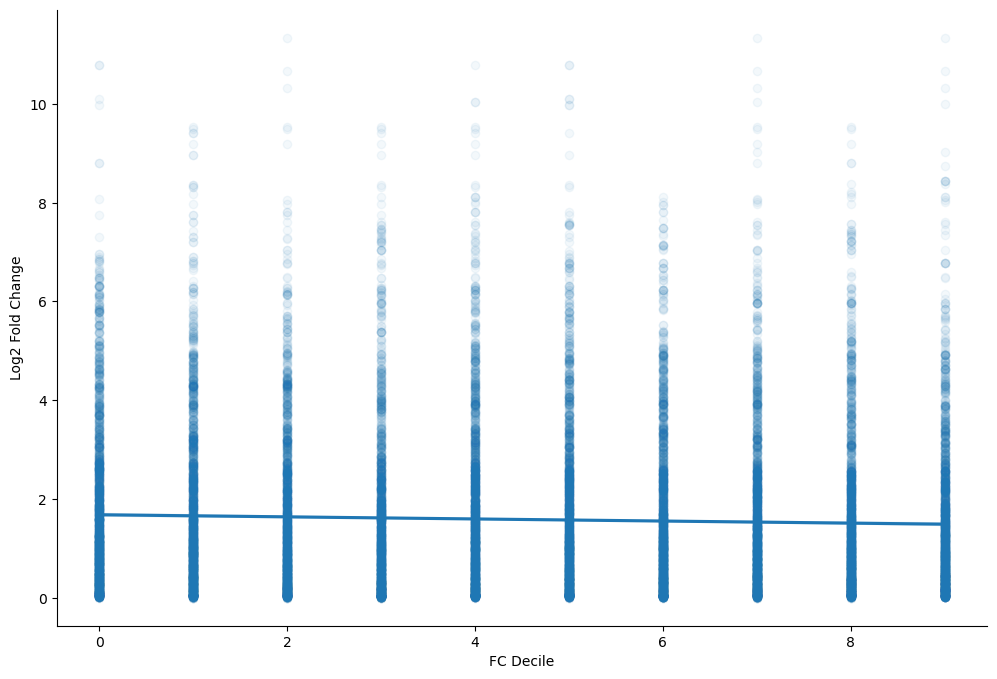

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax = sns.regplot(
    data=all_aligned_paralogs_dropped_no_fc_no_zero,
    x="FC Decile",
    y="Log2 Fold Change",
    scatter_kws={"alpha": 0.05},
)
# plt.ylabel("Percent of Total", fontsize = 20)
# plt.xlabel("Fold Change Between Gene Pairs in Quitoense", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
# plt.ylim((0, 1250))
# plt.title("Current Threshold is 31", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

In [ ]:
# fig, ax = plt.subplots(figsize = (12,8))
# fig.patch.set_facecolor('white')
# ax = sns.regplot(data = all_aligned_paralogs_dropped_no_fc_no_zero, x = 'fc_top10', y = 'Log2 Fold Change Decile', scatter_kws={'alpha':0.05})
# #plt.ylabel("Percent of Total", fontsize = 20)
# #plt.xlabel("Fold Change Between Gene Pairs in Quitoense", fontsize = 20)
# sns.despine()

# ax.grid(False)
# ax.spines["bottom"].set_color("black")
# ax.spines["left"].set_color("black")
# #plt.xlim((-7,7))
# # plt.ylim((0, 1250))
# #plt.title("Current Threshold is 31", fontsize = 20)
# #plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# #plt.yticks(fontsize = 11)

In [ ]:
# fig, ax = plt.subplots(figsize = (12,8))
# fig.patch.set_facecolor('white')
# ax = sns.regplot(data = all_aligned_paralogs_dropped_no_fc_no_zero, x = 'FC Decile', y = 'Log2 Fold Change', scatter_kws={'alpha':0.05},)
# plt.ylabel("Log2 Fold Change Between Genes in Orthogroup in Other Species ", fontsize = 10)
# plt.xlabel("Tomato Functional Conservation Between Genes in Orthogroup", fontsize = 10)
# sns.despine()

# ax.grid(False)
# ax.spines["bottom"].set_color("black")
# ax.spines["left"].set_color("black")
# #plt.xlim((-7,7))
# # plt.ylim((0, 1250))
# #plt.title("Current Threshold is 31", fontsize = 20)
# #plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# #plt.yticks(fontsize = 11)

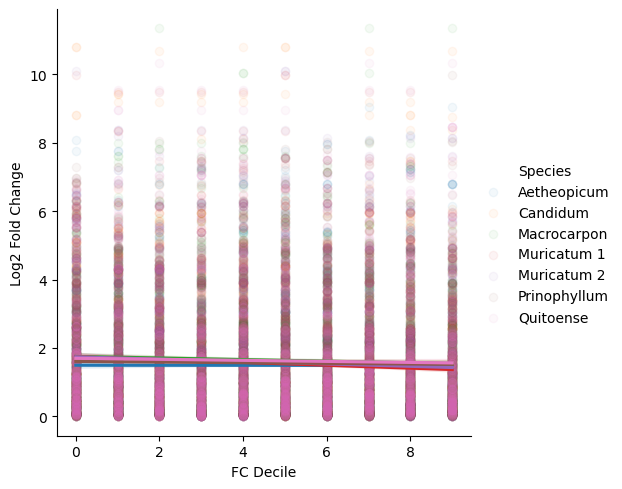

In [ ]:
sns.lmplot0.(data = all_aligned_paralogs_dropped_no_fc_no_zero, x = 'FC Decile', y = 'Log2 Fold Change', scatter_kws={'alpha':0.05}, hue = "Species")

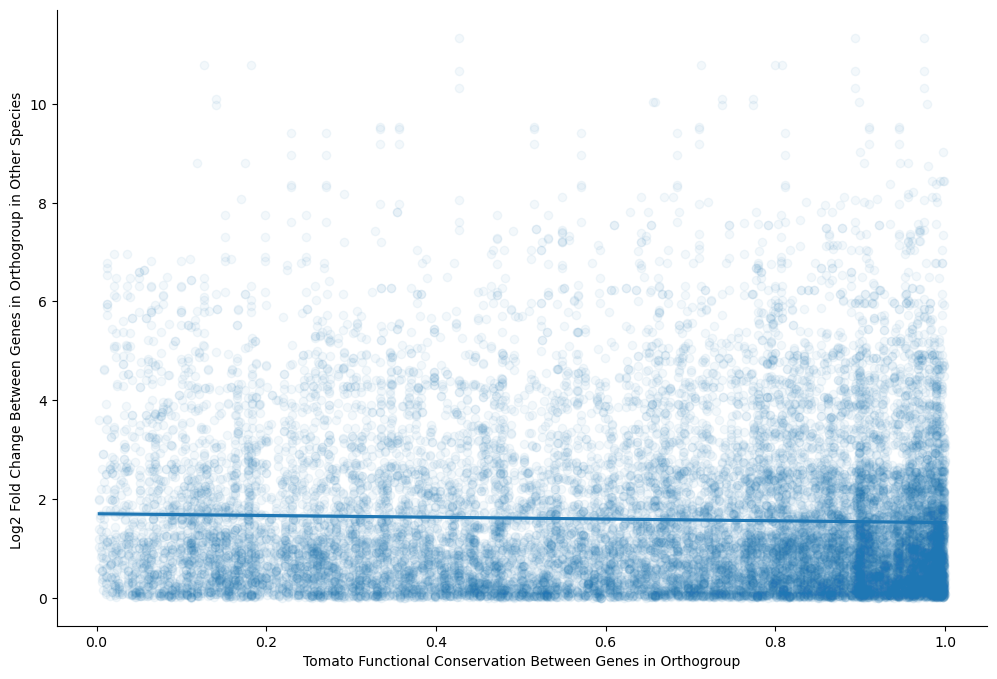

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax = sns.regplot(
    data=all_aligned_paralogs_dropped_no_fc_no_zero,
    x="fc_top10",
    y="Log2 Fold Change",
    scatter_kws={"alpha": 0.05},
)
plt.ylabel(
    "Log2 Fold Change Between Genes in Orthogroup in Other Species ", fontsize=10
)
plt.xlabel("Tomato Functional Conservation Between Genes in Orthogroup", fontsize=10)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
# plt.ylim((0, 1250))
# plt.title("Current Threshold is 31", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

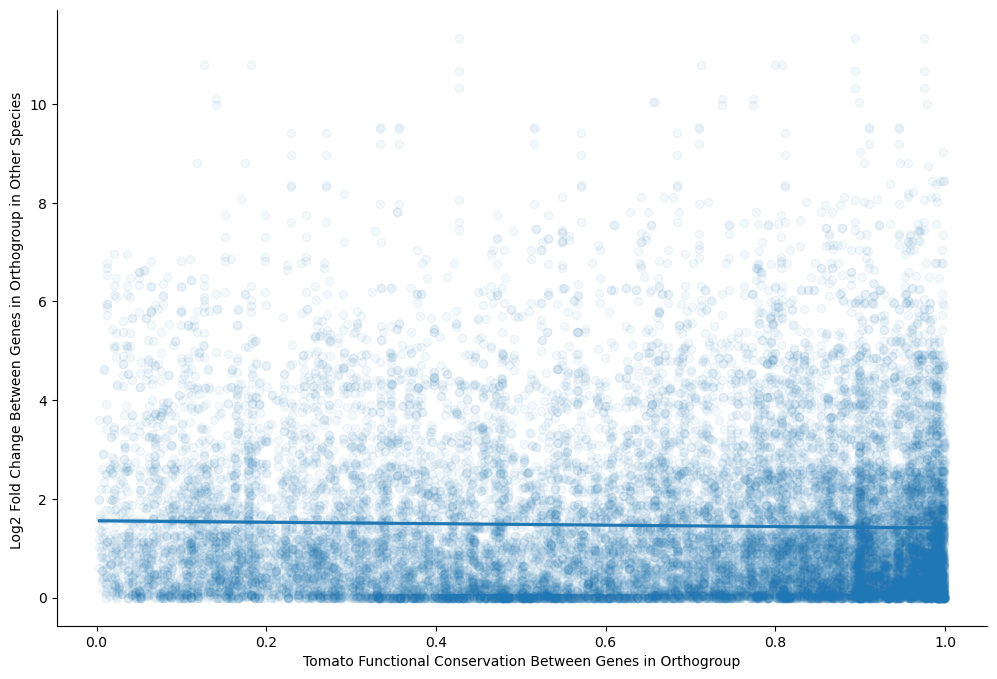

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax = sns.regplot(
    data=all_aligned_paralogs_dropped_no_fc,
    x="fc_top10",
    y="Log2 Fold Change",
    scatter_kws={"alpha": 0.05},
)
plt.ylabel(
    "Log2 Fold Change Between Genes in Orthogroup in Other Species ", fontsize=10
)
plt.xlabel("Tomato Functional Conservation Between Genes in Orthogroup", fontsize=10)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
# plt.ylim((0, 1250))
# plt.title("Current Threshold is 31", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

In [ ]:
all_aligned_paralogs_with_fold_change_filtered_low_expressed_genes = pd.DataFrame()
for species in paralog_rep_expression.keys():
    current_species_expression = paralog_rep_expression[species]
    current_species_expression["Mean"] = current_species_expression[
        ["Alpha Gene Mean Expression", "Beta Gene Mean Expression"]
    ].mean(axis=1)
    current_species_expression["Mean Decile"] = pd.qcut(
        current_species_expression["Mean"], q=20, labels=False, duplicates="drop"
    )
    current_species_expression = current_species_expression.loc[
        current_species_expression["Mean Decile"] > 2
    ]
    current_species_expression = current_species_expression[
        ["Orthogroup", "Log2 Fold Change"]
    ]
    current_species_expression["Species"] = species
    species_expression_with_fold_change = paralogs_with_aligned_orthogroups.merge(
        right=current_species_expression,
        right_on="Orthogroup",
        left_on="Gene 1 Orthogroup",
    )
    all_aligned_paralogs_with_fold_change_filtered_low_expressed_genes = pd.concat(
        [
            all_aligned_paralogs_with_fold_change_filtered_low_expressed_genes,
            species_expression_with_fold_change,
        ]
    )


all_aligned_paralogs_dropped_no_fc_filtered_low = (
    all_aligned_paralogs_with_fold_change_filtered_low_expressed_genes.dropna(
        subset="fc_top10"
    )
)


all_aligned_paralogs_dropped_no_fc_filtered_low["Log2 Fold Change"] = abs(
    all_aligned_paralogs_dropped_no_fc_filtered_low["Log2 Fold Change"]
)

all_aligned_paralogs_dropped_no_fc_filtered_low["FC Decile"] = pd.qcut(
    all_aligned_paralogs_dropped_no_fc_filtered_low["fc_top10"], q=10, labels=False
)

/tmp/ipykernel_4106694/2404107754.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_aligned_paralogs_dropped_no_fc_filtered_low['Log2 Fold Change'] = abs(all_aligned_paralogs_dropped_no_fc_filtered_low['Log2 Fold Change'])
/tmp/ipykernel_4106694/2404107754.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_aligned_paralogs_dropped_no_fc_filtered_low['FC Decile'] = pd.qcut(all_aligned_paralogs_dropped_no_fc_filtered_low['fc_top10'], q = 10,labels = False)


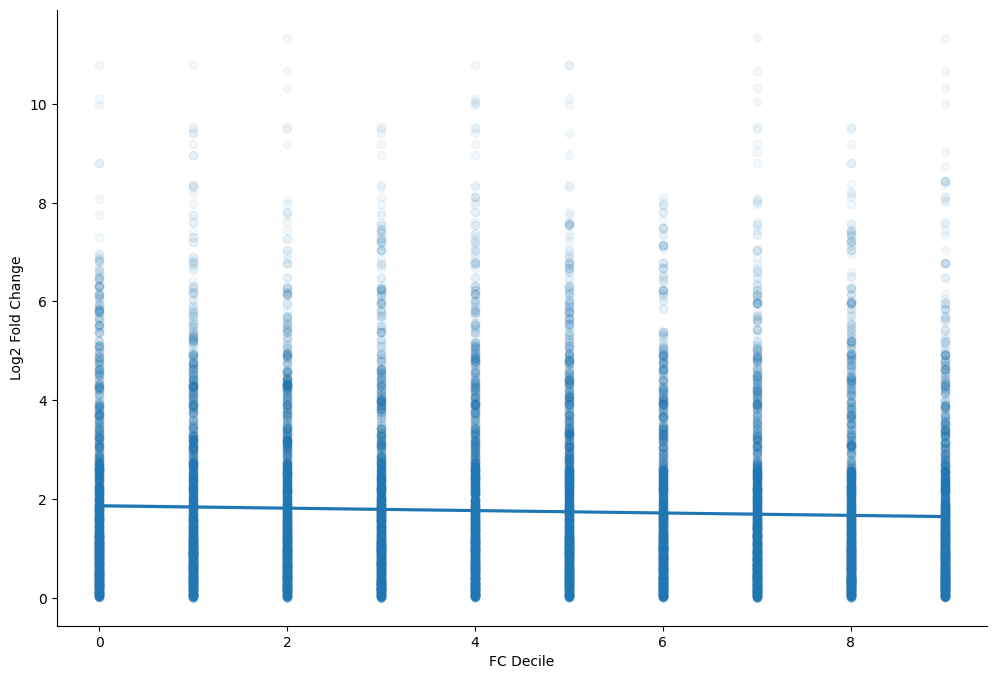

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax = sns.regplot(
    data=all_aligned_paralogs_dropped_no_fc_filtered_low,
    x="FC Decile",
    y="Log2 Fold Change",
    scatter_kws={"alpha": 0.05},
)
# plt.ylabel("Percent of Total", fontsize = 20)
# plt.xlabel("Fold Change Between Gene Pairs in Quitoense", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
# plt.ylim((0, 1250))
# plt.title("Current Threshold is 31", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)

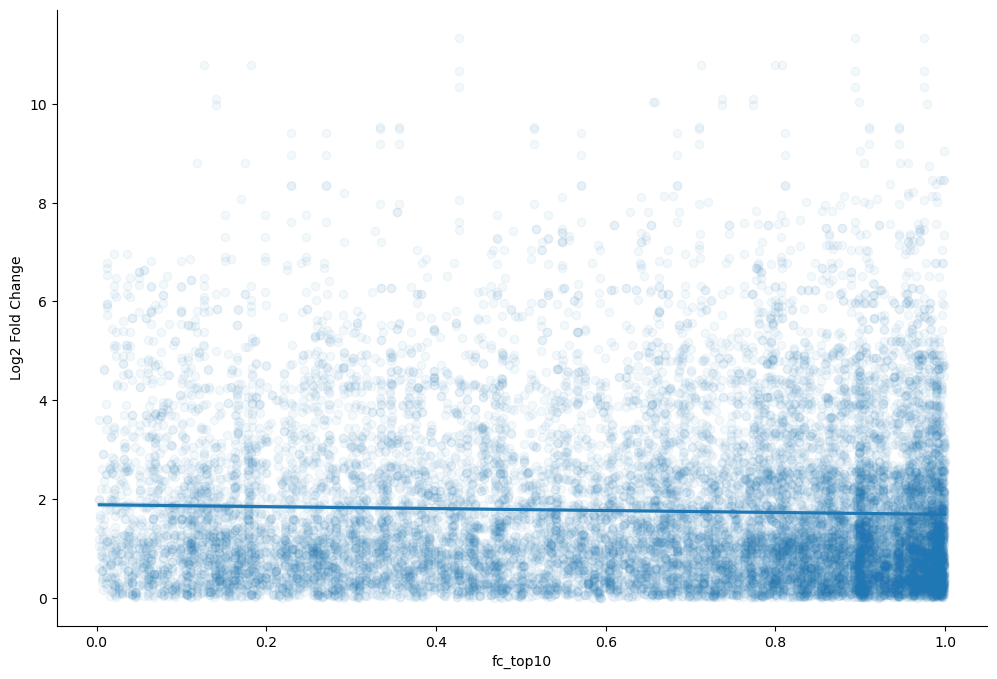

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor("white")
ax = sns.regplot(
    data=all_aligned_paralogs_dropped_no_fc_filtered_low,
    x="fc_top10",
    y="Log2 Fold Change",
    scatter_kws={"alpha": 0.05},
)
# plt.ylabel("Percent of Total", fontsize = 20)
# plt.xlabel("Fold Change Between Gene Pairs in Quitoense", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((-7,7))
# plt.ylim((0, 1250))
# plt.title("Current Threshold is 31", fontsize = 20)
# plt.xticks(fontsize = 11, ticks = [0,10,20,30,40,50])
# plt.yticks(fontsize = 11)